# Packages

In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

%matplotlib inline

pd.set_option('display.max_columns', None)

# Scraping

I used Selenium and beautifulsoup to scrape NBA.com. It's important to note that I used the data from the traditional, advanced and scoring pages. Scoring and traditional use this chunk while advanced uses the next chunk. For some reason, the HTML on the advanced page includes things that don't work with this chunk and I had to modify it

In [2]:
def scrape_nba_com(drive, table_name):

    
    soup = BeautifulSoup(drive.page_source, 'html.parser')
    table = soup.find("table", {"class" : table_name}) # Find the table that has table_name
    
    thead = table.find("thead") # Get the head

    # th stands for table-header
    table_headers = thead.find_all("th") # Get all table headers

    # extract actual header name from th elements
    cleaned_headers = [i.text for i in table_headers]

    # more clean up
    cleaned_headers = [i for i in cleaned_headers if "RANK" not in i]
    
    # Get rows
    table_rows = table.find("tbody").find_all("tr")
    
    td_in_rows = [r.find_all("td") for r in table_rows]

    # nested list comprehension to extract actual data from each row
    # code is basically identical to above cell
    table_data = [[td.text for td in i] for i in td_in_rows]
    
    # Change everything into a dataframe
    df = pd.DataFrame(data=table_data, 
             columns=cleaned_headers)
    
    return df

In [3]:
def scrape_nba_com_ad(drive, table_name):
    #driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    #driver.get(url)
    
    soup = BeautifulSoup(drive.page_source, 'html.parser')
    table = soup.find("table", {"class" : table_name})
    
    thead = table.find("thead")

    # th stands for table-header
    table_headers = thead.find_all("th")

    # extract actual header name from th elements
    cleaned_headers = [i.text for i in table_headers]

    # more clean up
    cleaned_headers = [i for i in cleaned_headers if "RANK" not in i]
    
    cleaned_headers = cleaned_headers[:24] # This is the part that is different. Only take columns up to 24
    
    # Get rows
    table_rows = table.find("tbody").find_all("tr")
    
    td_in_rows = [r.find_all("td") for r in table_rows]

    # nested list comprehension to extract actual data from each row
    # code is basically identical to above cell
    # 
    table_data = [[td.text for td in i] for i in td_in_rows]
    
    df = pd.DataFrame(data=table_data, 
             columns=cleaned_headers)
    
    return df

Some important things to note: I only took data from 2022-2023 and I only took traditional, advanced and scoring. In addition, when you run the chunk below, the nba.com page will show up. Click accept for the cookies, and change the drop down arrow that is next to page from 1 to All. This will make it so that all the players show up. Otherwise, you will only get the first 50. This must be done with each of the chunks below that take you to the website. Once you change it to all, minimize the page and run the df_2022 = cell and you should get the dataframe

This one is for traditional

In [4]:
url = "https://www.nba.com/stats/players/traditional?PerMode=PerGame&sort=PTS&dir=-1&SeasonType=Regular+Season&Season=2022-23"
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get(url)

In [5]:
df_2022 = scrape_nba_com(driver, "Crom_table__p1iZz") # Get the dataframe

In [6]:
df_2022 # Check that it looks correct

Player Team Age  GP   W   L   Min   PTS   FGM  \
0      1              Joel Embiid  PHI  29  66  43  23  34.6  33.1  11.0   
1      2              Luka Doncic  DAL  24  66  33  33  36.2  32.4  10.9   
2      3           Damian Lillard  POR  32  58  27  31  36.3  32.2   9.6   
3      4  Shai Gilgeous-Alexander  OKC  24  68  33  35  35.5  31.4  10.4   
4      5    Giannis Antetokounmpo  MIL  28  63  47  16  32.1  31.1  11.2   
..   ...                      ...  ...  ..  ..  ..  ..   ...   ...   ...   
534  535         Alondes Williams  BKN  23   1   1   0   5.3   0.0   0.0   
535  535            Deonte Burton  SAC  29   2   1   1   3.2   0.0   0.0   
536  535            Frank Jackson  UTA  25   1   0   1   5.1   0.0   0.0   
537  535       Michael Foster Jr.  PHI  20   1   1   0   1.0   0.0   0.0   
538  535           Sterling Brown  LAL  28   4   2   2   6.1   0.0   0.0   

      FGA   FG%  3PM   3PA   3P%   FTM   FTA   FT% OREB DREB   REB  AST  TOV  \
0    20.1  54.8  1.0   3.0  33.0  10.0  11.7  85.7  1.7  8.4  10.2  4.2  3.4   
1    22.0  49.6  2.8   8.2  34.2   7.8  10.5  74.2  0.8  7.8   8.6  8.0  3.6   
2    20.7  46.3  4.2  11.3  37.1   8.8   9.6  91.4  0.8  4.0   4.8  7.3  3.3   
3    20.3  51.0  0.9   2.5  34.5   9.8  10.9  90.5  0.9  4.0   4.8  5.5  2.8   
4    20.3  55.3  0.7   2.7  27.5   7.9  12.3  64.5  2.2  9.6  11.8  5.7  3.9   
..    ...   ...  ...   ...   ...   ...   ...   ...  ...  ...   ...  ...  ...   
534   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  1.0   1.0  0.0  2.0   
535   1.0   0.0  0.0   0.5   0.0   0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0   
536   3.0   0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  1.0   2.0  1.0  0.0   
537   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0   
538   1.0   0.0  0.0   0.5   0.0   0.0   0.0   0.0  0.8  1.3   2.0  0.5  0.0   

     STL  BLK   PF    FP   DD2   TD3   +/-  
0    1.0  1.7  3.1  56.2  39.0   1.0   6.4  
1    1.4  0.5  2.5  56.8  36.0  10.0   1.9  
2    0.9  0.3  1.9  49.1  16.0   2.0   1.8  
3    1.6  1.0  2.8  50.4   3.0   0.0   2.2  
4    0.8  0.8  3.1  54.8  46.0   6.0   5.4  
..   ...  ...  ...   ...   ...   ...   ...  
534  0.0  0.0  1.0  -0.8   0.0   0.0  -5.0  
535  0.0  0.0  0.0   0.0   0.0   0.0   2.5  
536  0.0  0.0  0.0   3.9   0.0   0.0  -2.0  
537  0.0  0.0  0.0   0.0   0.0   0.0  -2.0  
538  0.8  0.0  1.0   5.4   0.0   0.0  -1.0  

[539 rows x 30 columns]

This one is for advanced

In [7]:
url = "https://www.nba.com/stats/players/advanced?PerMode=PerGame&sort=PTS&dir=-1&SeasonType=Regular+Season&Season=2022-23"
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get(url)

In [8]:
ad_2022 = scrape_nba_com_ad(driver, "Crom_table__p1iZz")

In [9]:
ad_2022

PLAYER TEAM AGE  GP   W   L   MIN OFFRTG DEFRTG NETRTG  AST%  \
0           A.J. Lawson  DAL  22  15   5  10   7.2   96.3  116.4  -20.1   3.2   
1              AJ Green  MIL  23  35  27   8   9.9  107.9  112.8   -4.9   9.2   
2            AJ Griffin  ATL  19  72  34  38  19.5  113.6  112.0    1.5   7.0   
3          Aaron Gordon  DEN  27  68  45  23  30.2  123.0  110.9   12.1  12.9   
4         Aaron Holiday  ATL  26  63  32  31  13.4  110.8  110.0    0.9  13.5   
..  ..              ...  ...  ..  ..  ..  ..   ...    ...    ...    ...   ...   
534        Zach Collins  SAS  25  63  20  43  22.9  108.7  116.3   -7.5  18.0   
535         Zach LaVine  CHI  28  77  38  39  35.9  112.0  111.7    0.3  18.7   
536          Zeke Nnaji  DEN  22  53  34  19  13.7  101.5  107.4   -5.9   4.0   
537     Ziaire Williams  MEM  21  37  21  16  15.2  106.9  112.2   -5.2   8.6   
538     Zion Williamson  NOP  22  29  17  12  33.0  116.2  108.4    7.8  23.1   

    AST/TO AST RATIO OREB% DREB%  REB% TO RATIO  EFG%   TS%  USG%    PACE  \
0     0.67       3.8   4.6  15.2   9.1      5.8  61.4  58.9  18.9  105.96   
1     2.44      14.0   1.6  10.5   6.1      5.7  60.0  60.7  15.9  102.90   
2     1.74      10.9   2.6   8.0   5.3      6.3  56.0  57.7  17.4  102.67   
3     2.07      16.9   8.6  13.6  11.2      8.2  60.3  61.7  20.6  100.16   
4     2.47      24.9   2.8   5.9   4.3     10.1  50.0  52.8  12.9  103.27   
..     ...       ...   ...   ...   ...      ...   ...   ...   ...     ...   
534   1.40      19.6   7.6  19.0  13.3     14.0  56.8  59.9  20.9  104.06   
535   1.69      15.7   1.6  10.8   6.4      9.3  55.8  60.7  27.8   99.70   
536   0.58       6.6   8.7   9.9   9.3     11.4  60.5  62.0  14.9   98.40   
537   0.95      12.6   2.8  10.5   6.7     13.4  49.2  51.1  17.8  102.80   
538   1.34      16.5   6.0  14.8  10.4     12.3  61.5  65.2  28.8  102.17   

      PIE  POSS  
0     7.6   240  
1     7.6   744  
2     7.7  3005  
3    11.2  4288  
4     5.4  1819  
..    ...   ...  
534  11.0  3121  
535  12.6  5750  
536   7.2  1488  
537   5.2  1195  
538  17.1  2031  

[539 rows x 24 columns]

This one is for scoring

In [10]:
url = "https://www.nba.com/stats/players/scoring?PerMode=PerGame&sort=PTS&dir=-1&SeasonType=Regular+Season&Season=2022-23"
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get(url)

In [11]:
score_2022 = scrape_nba_com(driver, "Crom_table__p1iZz")

In [12]:
score_2022

Player TEAM AGE  GP   W   L   MIN %FGA2PT %FGA3PT %PTS2PT  \
0           A.J. Lawson  DAL  22  15   5  10   7.2    43.2    56.8    42.9   
1              AJ Green  MIL  23  35  27   8   9.9    16.0    84.0    11.7   
2            AJ Griffin  ATL  19  72  34  38  19.5    51.4    48.6    46.0   
3          Aaron Gordon  DEN  27  68  45  23  30.2    77.3    22.7    66.5   
4         Aaron Holiday  ATL  26  63  32  31  13.4    60.0    40.0    45.3   
..  ..              ...  ...  ..  ..  ..  ..   ...     ...     ...     ...   
534        Zach Collins  SAS  25  63  20  43  22.9    73.2    26.8    62.7   
535         Zach LaVine  CHI  28  77  38  39  35.9    60.8    39.2    49.0   
536          Zeke Nnaji  DEN  22  53  34  19  13.7    66.8    33.2    67.1   
537     Ziaire Williams  MEM  21  37  21  16  15.2    50.5    49.5    56.2   
538     Zion Williamson  NOP  22  29  17  12  33.0    95.9     4.1    73.7   

    %PTS2PT MR %PTS3PT %PTSFBPs %PTSFT %PTSOFFTO %PTSPITP 2FGM%AST 2FGM%UAST  \
0          0.0    53.6     19.6    3.5       3.6     42.9     50.0      50.0   
1          5.2    85.7      7.8    2.6       7.1      6.5     77.8      22.2   
2          9.7    47.4     10.5    6.6      11.0     36.3     55.8      44.2   
3          2.5    16.2     14.3   17.3      12.6     64.0     63.1      36.9   
4          7.3    43.7      6.9   11.0      13.8     38.1     21.4      78.6   
..         ...     ...      ...    ...       ...      ...      ...       ...   
534        5.7    22.6      4.5   14.7       9.8     56.9     58.1      41.9   
535       12.1    32.0     15.7   19.0      17.0     36.9     33.5      66.5   
536        0.7    18.4     11.9   14.5      15.9     66.4     72.0      28.0   
537        6.7    35.7     22.9    8.1      18.6     49.5     78.0      22.0   
538        0.3     2.8     11.1   23.5      14.3     73.5     45.7      54.3   

    3FGM%AST 3FGM%UAST FGM%AST FGM%UAST  
0        100       0.0    72.7     27.3  
1       90.9       9.1    88.7     11.3  
2       89.1      10.9    69.4     30.6  
3       73.3      26.7    64.6     35.4  
4       86.1      13.9    46.7     53.3  
..       ...       ...     ...      ...  
534      100       0.0    66.2     33.8  
535     64.7      35.3    42.9     57.1  
536      100       0.0    76.4     23.6  
537     88.0      12.0    81.0     19.0  
538     85.7      14.3    46.7     53.3  

[539 rows x 23 columns]

In [13]:
# This will merge the dataframes together
data = pd.merge(pd.merge(df_2022, ad_2022, left_on="Player", right_on="PLAYER"), score_2022, on="Player")

In [14]:
data # make sure it worked

_x                   Player Team Age GP_x W_x L_x   Min   PTS   FGM  \
0      1              Joel Embiid  PHI  29   66  43  23  34.6  33.1  11.0   
1      2              Luka Doncic  DAL  24   66  33  33  36.2  32.4  10.9   
2      3           Damian Lillard  POR  32   58  27  31  36.3  32.2   9.6   
3      4  Shai Gilgeous-Alexander  OKC  24   68  33  35  35.5  31.4  10.4   
4      5    Giannis Antetokounmpo  MIL  28   63  47  16  32.1  31.1  11.2   
..   ...                      ...  ...  ..  ...  ..  ..   ...   ...   ...   
534  535         Alondes Williams  BKN  23    1   1   0   5.3   0.0   0.0   
535  535            Deonte Burton  SAC  29    2   1   1   3.2   0.0   0.0   
536  535            Frank Jackson  UTA  25    1   0   1   5.1   0.0   0.0   
537  535       Michael Foster Jr.  PHI  20    1   1   0   1.0   0.0   0.0   
538  535           Sterling Brown  LAL  28    4   2   2   6.1   0.0   0.0   

      FGA   FG%  3PM   3PA   3P%   FTM   FTA   FT% OREB DREB   REB  AST  TOV  \
0    20.1  54.8  1.0   3.0  33.0  10.0  11.7  85.7  1.7  8.4  10.2  4.2  3.4   
1    22.0  49.6  2.8   8.2  34.2   7.8  10.5  74.2  0.8  7.8   8.6  8.0  3.6   
2    20.7  46.3  4.2  11.3  37.1   8.8   9.6  91.4  0.8  4.0   4.8  7.3  3.3   
3    20.3  51.0  0.9   2.5  34.5   9.8  10.9  90.5  0.9  4.0   4.8  5.5  2.8   
4    20.3  55.3  0.7   2.7  27.5   7.9  12.3  64.5  2.2  9.6  11.8  5.7  3.9   
..    ...   ...  ...   ...   ...   ...   ...   ...  ...  ...   ...  ...  ...   
534   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  1.0   1.0  0.0  2.0   
535   1.0   0.0  0.0   0.5   0.0   0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0   
536   3.0   0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  1.0   2.0  1.0  0.0   
537   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0   
538   1.0   0.0  0.0   0.5   0.0   0.0   0.0   0.0  0.8  1.3   2.0  0.5  0.0   

     STL  BLK   PF    FP   DD2   TD3   +/-  _y                   PLAYER  \
0    1.0  1.7  3.1  56.2  39.0   1.0   6.4                  Joel Embiid   
1    1.4  0.5  2.5  56.8  36.0  10.0   1.9                  Luka Doncic   
2    0.9  0.3  1.9  49.1  16.0   2.0   1.8               Damian Lillard   
3    1.6  1.0  2.8  50.4   3.0   0.0   2.2      Shai Gilgeous-Alexander   
4    0.8  0.8  3.1  54.8  46.0   6.0   5.4        Giannis Antetokounmpo   
..   ...  ...  ...   ...   ...   ...   ...  ..                      ...   
534  0.0  0.0  1.0  -0.8   0.0   0.0  -5.0             Alondes Williams   
535  0.0  0.0  0.0   0.0   0.0   0.0   2.5                Deonte Burton   
536  0.0  0.0  0.0   3.9   0.0   0.0  -2.0                Frank Jackson   
537  0.0  0.0  0.0   0.0   0.0   0.0  -2.0           Michael Foster Jr.   
538  0.8  0.0  1.0   5.4   0.0   0.0  -1.0               Sterling Brown   

    TEAM_x AGE_x GP_y W_y L_y MIN_x OFFRTG DEFRTG  NETRTG  AST% AST/TO  \
0      PHI    29   66  43  23  34.6  119.0  110.2     8.8  23.3   1.21   
1      DAL    24   66  33  33  36.2  118.1  116.0     2.1  40.8   2.24   
2      POR    32   58  27  31  36.3  119.5  117.4     2.1  33.8   2.23   
3      OKC    24   68  33  35  35.5  116.1  113.3     2.7  24.9   1.93   
4      MIL    28   63  47  16  32.1  116.4  109.2     7.2  31.4   1.46   
..     ...   ...  ...  ..  ..   ...    ...    ...     ...   ...    ...   
534    BKN    23    1   1   0   5.3   83.3  136.4   -53.0   0.0   0.00   
535    SAC    29    2   1   1   3.2  164.3  112.5    51.8   0.0   0.00   
536    UTA    25    1   0   1   5.1  100.0  122.2   -22.2  25.0   0.00   
537    PHI    20    1   1   0   1.0    0.0  100.0  -100.0   0.0   0.00   
538    LAL    28    4   2   2   6.1  106.8  106.3     0.4   7.7   0.00   

    AST RATIO OREB% DREB%  REB% TO RATIO  EFG%   TS%  USG%    PACE    PIE  \
0        12.7   5.7  24.3  15.7     10.5  57.3  65.5  37.0   97.34   21.3   
1        21.1   2.4  22.4  12.4      9.4  56.0  60.9  36.8   97.63   20.2   
2        20.8   2.2  11.2   6.8      9.3  56.4  64.5  33.1   99.78   17.3   
3        16.4   2.3  1

In [15]:
# Drop all duplicate columns and those that are not needed. Could also change the merge above to a different join
data = data.drop(['\xa0_x', '\xa0_y', 'GP_x', 'W_x', 'L_x', 'TEAM_x', 'PLAYER', 'AGE_x', 'GP_y', 'W_y', 'L_y', 'MIN_x', 'TEAM_y', 'AGE_y', 'MIN_y', ' '], axis=1)

In [16]:
data.head() # Make sure everything looks nice

Player Team Age   Min   PTS   FGM   FGA   FG%  3PM   3PA  \
0              Joel Embiid  PHI  29  34.6  33.1  11.0  20.1  54.8  1.0   3.0   
1              Luka Doncic  DAL  24  36.2  32.4  10.9  22.0  49.6  2.8   8.2   
2           Damian Lillard  POR  32  36.3  32.2   9.6  20.7  46.3  4.2  11.3   
3  Shai Gilgeous-Alexander  OKC  24  35.5  31.4  10.4  20.3  51.0  0.9   2.5   
4    Giannis Antetokounmpo  MIL  28  32.1  31.1  11.2  20.3  55.3  0.7   2.7   

    3P%   FTM   FTA   FT% OREB DREB   REB  AST  TOV  STL  BLK   PF    FP  \
0  33.0  10.0  11.7  85.7  1.7  8.4  10.2  4.2  3.4  1.0  1.7  3.1  56.2   
1  34.2   7.8  10.5  74.2  0.8  7.8   8.6  8.0  3.6  1.4  0.5  2.5  56.8   
2  37.1   8.8   9.6  91.4  0.8  4.0   4.8  7.3  3.3  0.9  0.3  1.9  49.1   
3  34.5   9.8  10.9  90.5  0.9  4.0   4.8  5.5  2.8  1.6  1.0  2.8  50.4   
4  27.5   7.9  12.3  64.5  2.2  9.6  11.8  5.7  3.9  0.8  0.8  3.1  54.8   

    DD2   TD3  +/- OFFRTG DEFRTG NETRTG  AST% AST/TO AST RATIO OREB% DREB%  \
0  39.0   1.0  6.4  119.0  110.2    8.8  23.3   1.21      12.7   5.7  24.3   
1  36.0  10.0  1.9  118.1  116.0    2.1  40.8   2.24      21.1   2.4  22.4   
2  16.0   2.0  1.8  119.5  117.4    2.1  33.8   2.23      20.8   2.2  11.2   
3   3.0   0.0  2.2  116.1  113.3    2.7  24.9   1.93      16.4   2.3  10.9   
4  46.0   6.0  5.4  116.4  109.2    7.2  31.4   1.46      16.2   6.5  26.8   

   REB% TO RATIO  EFG%   TS%  USG%    PACE   PIE  POSS  GP   W   L %FGA2PT  \
0  15.7     10.5  57.3  65.5  37.0   97.34  21.3  4639  66  43  23    84.9   
1  12.4      9.4  56.0  60.9  36.8   97.63  20.2  4874  66  33  33    62.7   
2   6.8      9.3  56.4  64.5  33.1   99.78  17.3  4385  58  27  31    45.3   
3   6.5      8.5  53.1  62.6  31.8  103.47  17.5  5211  68  33  35    87.8   
4  17.1     11.1  57.2  60.5  37.3  103.63  20.4  4380  63  47  16    86.6   

  %FGA3PT %PTS2PT %PTS2PT MR %PTS3PT %PTSFBPs %PTSFT %PTSOFFTO %PTSPITP  \
0    15.1    60.7       15.7     9.1      6.3   30.2      12.7     45.0   
1    37.3    50.0        8.5    26.0      5.2   24.0      14.0     41.4   
2    54.7    33.4        6.0    39.2      8.6   27.4      11.9     27.4   
3    12.2    60.5        9.7     8.1     12.7   31.4      17.7     50.8   
4    13.4    67.4        7.0     7.2     17.5   25.4      12.9     60.3   

  2FGM%AST 2FGM%UAST 3FGM%AST 3FGM%UAST FGM%AST FGM%UAST  
0     60.0      40.0     89.4      10.6    62.6     37.4  
1     13.1      86.9     21.6      78.4    15.3     84.7  
2     15.7      84.3     51.6      48.4    31.5     68.5  
3     20.1      79.9     31.0      69.0    21.0     79.0  
4     41.5      58.5     61.7      38.3    42.9     57.1

In [ ]:
# Write our data to a csv so we don't have to run everything again

#data.to_csv('data.csv', index=False)

# Data Exploration

In [3]:
df = pd.read_csv('data.csv') # I wrote the data to a csv and now I read it in

In [4]:
df.head() # Check that it looks correct

Player Team  Age   Min   PTS   FGM   FGA   FG%  3PM   3PA  \
0              Joel Embiid  PHI   29  34.6  33.1  11.0  20.1  54.8  1.0   3.0   
1              Luka Doncic  DAL   24  36.2  32.4  10.9  22.0  49.6  2.8   8.2   
2           Damian Lillard  POR   32  36.3  32.2   9.6  20.7  46.3  4.2  11.3   
3  Shai Gilgeous-Alexander  OKC   24  35.5  31.4  10.4  20.3  51.0  0.9   2.5   
4    Giannis Antetokounmpo  MIL   28  32.1  31.1  11.2  20.3  55.3  0.7   2.7   

    3P%   FTM   FTA   FT%  OREB  DREB   REB  AST  TOV  STL  BLK   PF    FP  \
0  33.0  10.0  11.7  85.7   1.7   8.4  10.2  4.2  3.4  1.0  1.7  3.1  56.2   
1  34.2   7.8  10.5  74.2   0.8   7.8   8.6  8.0  3.6  1.4  0.5  2.5  56.8   
2  37.1   8.8   9.6  91.4   0.8   4.0   4.8  7.3  3.3  0.9  0.3  1.9  49.1   
3  34.5   9.8  10.9  90.5   0.9   4.0   4.8  5.5  2.8  1.6  1.0  2.8  50.4   
4  27.5   7.9  12.3  64.5   2.2   9.6  11.8  5.7  3.9  0.8  0.8  3.1  54.8   

    DD2   TD3  +/-  OFFRTG  DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  \
0  39.0   1.0  6.4   119.0   110.2     8.8  23.3    1.21       12.7    5.7   
1  36.0  10.0  1.9   118.1   116.0     2.1  40.8    2.24       21.1    2.4   
2  16.0   2.0  1.8   119.5   117.4     2.1  33.8    2.23       20.8    2.2   
3   3.0   0.0  2.2   116.1   113.3     2.7  24.9    1.93       16.4    2.3   
4  46.0   6.0  5.4   116.4   109.2     7.2  31.4    1.46       16.2    6.5   

   DREB%  REB%  TO RATIO  EFG%   TS%  USG%    PACE   PIE  POSS  GP   W   L  \
0   24.3  15.7      10.5  57.3  65.5  37.0   97.34  21.3  4639  66  43  23   
1   22.4  12.4       9.4  56.0  60.9  36.8   97.63  20.2  4874  66  33  33   
2   11.2   6.8       9.3  56.4  64.5  33.1   99.78  17.3  4385  58  27  31   
3   10.9   6.5       8.5  53.1  62.6  31.8  103.47  17.5  5211  68  33  35   
4   26.8  17.1      11.1  57.2  60.5  37.3  103.63  20.4  4380  63  47  16   

   %FGA2PT  %FGA3PT  %PTS2PT  %PTS2PT MR  %PTS3PT  %PTSFBPs  %PTSFT  \
0     84.9     15.1     60.7        15.7      9.1       6.3    30.2   
1     62.7     37.3     50.0         8.5     26.0       5.2    24.0   
2     45.3     54.7     33.4         6.0     39.2       8.6    27.4   
3     87.8     12.2     60.5         9.7      8.1      12.7    31.4   
4     86.6     13.4     67.4         7.0      7.2      17.5    25.4   

   %PTSOFFTO  %PTSPITP  2FGM%AST  2FGM%UAST  3FGM%AST  3FGM%UAST  FGM%AST  \
0       12.7      45.0      60.0       40.0      89.4       10.6     62.6   
1       14.0      41.4      13.1       86.9      21.6       78.4     15.3   
2       11.9      27.4      15.7       84.3      51.6       48.4     31.5   
3       17.7      50.8      20.1       79.9      31.0       69.0     21.0   
4       12.9      60.3      41.5       58.5      61.7       38.3     42.9   

   FGM%UAST  
0      37.4  
1      84.7  
2      68.5  
3      79.0  
4      57.1

In [5]:
df.info() # Just to make sure that we have no null values, which we don't

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      539 non-null    object 
 1   Team        539 non-null    object 
 2   Age         539 non-null    int64  
 3   Min         539 non-null    float64
 4   PTS         539 non-null    float64
 5   FGM         539 non-null    float64
 6   FGA         539 non-null    float64
 7   FG%         539 non-null    float64
 8   3PM         539 non-null    float64
 9   3PA         539 non-null    float64
 10  3P%         539 non-null    float64
 11  FTM         539 non-null    float64
 12  FTA         539 non-null    float64
 13  FT%         539 non-null    float64
 14  OREB        539 non-null    float64
 15  DREB        539 non-null    float64
 16  REB         539 non-null    float64
 17  AST         539 non-null    float64
 18  TOV         539 non-null    float64
 19  STL         539 non-null    f

In [6]:
df.describe() # Look at some descriptive statistics

Age         Min         PTS         FGM         FGA         FG%  \
count  539.000000  539.000000  539.000000  539.000000  539.000000  539.000000   
mean    26.053803   19.796846    9.121336    3.348980    7.104824   46.325232   
std      4.314633    9.539535    6.842216    2.436261    4.956886   10.967271   
min     19.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     23.000000   12.450000    4.150000    1.600000    3.400000   41.650000   
50%     25.000000   19.200000    7.000000    2.700000    5.800000   45.500000   
75%     29.000000   28.350000   12.100000    4.500000    9.450000   50.600000   
max     42.000000   40.800000   33.100000   11.200000   22.200000  100.000000   

              3PM         3PA         3P%         FTM         FTA         FT%  \
count  539.000000  539.000000  539.000000  539.000000  539.000000  539.000000   
mean     0.990538    2.782560   31.530612    1.434694    1.856957   71.993506   
std      0.872442    2.244579   13.711120    1.545867    1.880916   21.280275   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.300000    1.000000   28.100000    0.500000    0.600000   66.700000   
50%      0.800000    2.400000   34.200000    0.900000    1.200000   76.300000   
75%      1.500000    4.100000   38.500000    1.850000    2.400000   84.100000   
max      4.900000   11.400000  100.000000   10.000000   12.300000  100.000000   

             OREB        DREB         REB         AST         TOV         STL  \
count  539.000000  539.000000  539.000000  539.000000  539.000000  539.000000   
mean     0.866234    2.676809    3.543228    2.068831    1.103711    0.609647   
std      0.747543    1.773074    2.346968    1.932954    0.826909    0.398533   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.300000    1.400000    1.800000    0.800000    0.500000    0.300000   
50%      0.700000    2.300000    3.000000    1.400000    0.900000    0.600000   
75%      1.100000    3.500000    4.500000    2.750000    1.500000    0.800000   
max      5.100000    9.600000   12.500000   10.700000    4.100000    3.000000   

              BLK          PF          FP         DD2         TD3         +/-  \
count  539.000000  539.000000  539.000000  539.000000  539.000000  539.000000   
mean     0.382375    1.687941   18.330427    4.011132    0.220779   -0.375139   
std      0.384414    0.792286   11.652091    8.770932    1.564432    3.166926   
min      0.000000    0.000000   -0.800000    0.000000    0.000000  -29.000000   
25%      0.100000    1.200000    9.650000    0.000000    0.000000   -1.900000   
50%      0.300000    1.600000   15.300000    0.000000    0.000000   -0.200000   
75%      0.500000    2.200000   25.100000    3.000000    0.000000    1.350000   
max      3.000000    5.000000   56.800000   65.000000   29.000000    9.300000   

           OFFRTG      DEFRTG      NETRTG        AST%      AST/TO   AST RATIO  \
count  539.000000  539.000000  539.000000  539.000000  539.000000  539.000000   
mean   109.877180  111.433395   -1.555288   13.700742    1.819555   17.541929   
std      9.728805    7.555920   12.470820    8.667679    1.124435    8.363304   
min      0.000000   60.000000 -100.000000    0.000000    0.000000    0.000000   
25%    107.100000  109.200000   -6.100000    7.400000    1.150000   11.900000   
50%    111.100000  112.200000   -0.600000   11.400000    1.670000   16.400000   
75%    114.300000  115.300000    3.300000   18.400000    2.300000   21.650000   
max    175.000000  163.600000   95.000000   45.700000   11.000000   58.300000   

            OREB%       DREB%        REB%    TO RATIO        EFG%         TS%  \
count  539.000000  539.000000  539.000000  539.000000  539.000000  539.000000   
mean     4.495176   13.224304    8.822263   10.252319   53.187941   56.058442   
std      3.562915    5.740101    4.051268    6.032949   10.618005   10.303772   
min      0.000000    0.000000    0.00000

We can already see some important things from the descriptive statistics. The first thing is that there are many variables whose minimum is 0. This means a player averaged 0 points per game or 0 free throw attempts per game, or whatever the variable may be. That's not going to help us, because it means those players are generally "garbage time players". They only play in the last few minutes when the score is lopsided. Even worse is a NETRTG of -100 or a PIE of -10.8. These are outliers caused by a lack of playing time and they could affect what we are trying to do. I will filter out those that don't play enough. The second thing is that there doesn't seem to be any data errors. There's no negative numbers where there shouldn't be or things of that nature. The third thing is that these variables are on different scales. We may need to standardize or normalize later on.

### Correlations

Let's look at the pairwise correlations and see what variables are highly correlated

In [7]:
correlations = df.corr()
correlations

Age       Min       PTS       FGM       FGA       FG%  \
Age         1.000000  0.141465  0.106178  0.093927  0.087601  0.069254   
Min         0.141465  1.000000  0.874386  0.879344  0.883663  0.185107   
PTS         0.106178  0.874386  1.000000  0.991753  0.982070  0.201940   
FGM         0.093927  0.879344  0.991753  1.000000  0.977324  0.249524   
FGA         0.087601  0.883663  0.982070  0.977324  1.000000  0.102137   
FG%         0.069254  0.185107  0.201940  0.249524  0.102137  1.000000   
3PM         0.154838  0.682903  0.702705  0.659124  0.745964 -0.111260   
3PA         0.136059  0.696960  0.715586  0.671131  0.775336 -0.177823   
3P%         0.103236  0.211986  0.218166  0.191461  0.217512  0.043123   
FTM         0.086528  0.710354  0.900180  0.862378  0.842125  0.167621   
FTA         0.070279  0.708431  0.890223  0.861850  0.829402  0.213223   
FT%         0.130108  0.347905  0.327889  0.299364  0.329343  0.049772   
OREB       -0.010731  0.386093  0.304307  0.360724  0.241994  0.480525   
DREB        0.115184  0.750189  0.714216  0.745424  0.673827  0.352392   
REB         0.083177  0.688285  0.635354  0.676889  0.584811  0.420051   
AST         0.171299  0.730612  0.722161  0.713027  0.741067  0.030367   
TOV         0.079445  0.786925  0.852160  0.850130  0.849196  0.152143   
STL         0.086499  0.721082  0.581842  0.581773  0.598588  0.048938   
BLK         0.026236  0.379099  0.327158  0.364302  0.269203  0.372583   
PF          0.083763  0.752922  0.604013  0.626573  0.588238  0.321116   
FP          0.131073  0.918150  0.952663  0.959370  0.930816  0.258848   
DD2         0.073168  0.488944  0.555874  0.579334  0.499863  0.268598   
TD3         0.037615  0.194129  0.272061  0.278209  0.236845  0.086526   
+/-         0.203539  0.170033  0.253677  0.241080  0.210371  0.088961   
OFFRTG      0.165613  0.432883  0.385475  0.382224  0.367977  0.186923   
DEFRTG     -0.006589  0.356788  0.251745  0.260198  0.263714  0.060094   
NETRTG      0.132952  0.121676  0.148388  0.140731  0.127526  0.109435   
AST%        0.145083  0.369311  0.439515  0.427103  0.466512 -0.111962   
AST/TO      0.157116  0.184209  0.072220  0.063207  0.102980 -0.155847   
AST RATIO   0.195219  0.177022  0.023455  0.018972  0.052466 -0.160476   
OREB%      -0.059278 -0.137951 -0.137635 -0.090841 -0.203355  0.437493   
DREB%       0.001711  0.048167  0.097341  0.134623  0.045574  0.313422   
REB%       -0.011425 -0.013240  0.022448  0.069412 -0.046635  0.438926   
TO RATIO   -0.007156 -0.087250 -0.098331 -0.089439 -0.122794  0.114673   
EFG%        0.124377  0.220694  0.210333  0.236849  0.120320  0.916954   
TS%         0.129556  0.273186  0.291327  0.301693  0.192273  0.874155   
USG%       -0.017307  0.414689  0.715835  0.698401  0.721353  0.004980   
PACE       -0.099569 -0.303390 -0.217161 -0.215185 -0.218987  0.015055   
PIE         0.103656  0.428535  0.596013  0.603178  0.525808  0.485037   
POSS        0.108307  0.877030  0.767651  0.769704  0.771661  0.187085   
GP          0.085892  0.649891  0.506893  0.513014  0.506447  0.230157   
W           0.172614  0.589629  0.478508  0.482467  0.464970  0.216416   
L          -0.028632  0.555768  0.413408  0.420363  0.427187  0.188630   
%FGA2PT    -0.071695  0.073892  0.135628  0.196702  0.079130  0.616131   
%FGA3PT     0.090077 -0.044962 -0.114121 -0.174949 -0.055504 -0.549303   
%PTS2PT    -0.089300  0.014108  0.047683  0.120044  0.006700  0.625311   
%PTS2PT MR  0.146203  0.177274  0.248702  0.255441  0.279357  0.048810   
%PTS3PT     0.097349 -0.004497 -0.089468 -0.138863 -0.032357 -0.435936   
%PTSFBPs   -0.140179 -0.062308 -0.039062 -0.037951 -0.022375 -0.013374   
%PTSFT     -0.026550 -0.016905  0.086858  0.051201  0.050566 -0.290526   
%PTSOFFTO  -0.116107  0.018578 -0.016638 -0.015458 -0.011706  0.044939   
%PTSPITP   -0.137336 -0.047885 -0.039999  0.027996 -0.090487  0.590949   
2FGM%AST    0.015655 -0.115571 -0.197412 -0.174075 -0.241023  0.374713   
2FGM%UAST   0.039718 

In [8]:
# Lets now only see the correlations that meet certain thresholds. I set mine as 0.75. I also eliminate those that are the correlation of a column against itself

threshold = 0.75

positive_correlations = correlations[(correlations > threshold) & (correlations < 1)]

In [9]:
# Now we print the correlations and columns that have those correlations that meet the threshold

for column in positive_correlations:
    above_threshold = positive_correlations[column].dropna()
    for col, corr in above_threshold.iteritems():
        print(f"Correlation: {corr:.3f}, Columns: {column} and {col}")

Correlation: 0.874, Columns: Min and PTS
Correlation: 0.879, Columns: Min and FGM
Correlation: 0.884, Columns: Min and FGA
Correlation: 0.750, Columns: Min and DREB
Correlation: 0.787, Columns: Min and TOV
Correlation: 0.753, Columns: Min and PF
Correlation: 0.918, Columns: Min and FP
Correlation: 0.877, Columns: Min and POSS
Correlation: 0.874, Columns: PTS and Min
Correlation: 0.992, Columns: PTS and FGM
Correlation: 0.982, Columns: PTS and FGA
Correlation: 0.900, Columns: PTS and FTM
Correlation: 0.890, Columns: PTS and FTA
Correlation: 0.852, Columns: PTS and TOV
Correlation: 0.953, Columns: PTS and FP
Correlation: 0.768, Columns: PTS and POSS
Correlation: 0.879, Columns: FGM and Min
Correlation: 0.992, Columns: FGM and PTS
Correlation: 0.977, Columns: FGM and FGA
Correlation: 0.862, Columns: FGM and FTM
Correlation: 0.862, Columns: FGM and FTA
Correlation: 0.850, Columns: FGM and TOV
Correlation: 0.959, Columns: FGM and FP
Correlation: 0.770, Columns: FGM and POSS
Correlation: 0.8

In [10]:
# This one is for variables that are negatively correlated
threshold = -0.75

negative_correlations = correlations[correlations < threshold]

for column in negative_correlations:
    above_threshold = negative_correlations[column].dropna()
    for col, corr in above_threshold.iteritems():
        print(f"Correlation: {corr:.3f}, Columns: {column} and {col}")

Correlation: -0.962, Columns: %FGA2PT and %FGA3PT
Correlation: -0.883, Columns: %FGA2PT and %PTS3PT
Correlation: -0.962, Columns: %FGA3PT and %FGA2PT
Correlation: -0.872, Columns: %FGA3PT and %PTS2PT
Correlation: -0.815, Columns: %FGA3PT and %PTSPITP
Correlation: -0.872, Columns: %PTS2PT and %FGA3PT
Correlation: -0.860, Columns: %PTS2PT and %PTS3PT
Correlation: -0.883, Columns: %PTS3PT and %FGA2PT
Correlation: -0.860, Columns: %PTS3PT and %PTS2PT
Correlation: -0.814, Columns: %PTS3PT and %PTSPITP
Correlation: -0.815, Columns: %PTSPITP and %FGA3PT
Correlation: -0.814, Columns: %PTSPITP and %PTS3PT
Correlation: -0.853, Columns: FGM%AST and FGM%UAST
Correlation: -0.853, Columns: FGM%UAST and FGM%AST


There are many variables that are highly correlated that make sense. For example, FTM and FTA or REB and DREB. Knowing what we know about basketball, it makes sense that as the number of defensive rebounds go up, so do the number of total rebounds. In addition, the negative correlations make sense as well. For example, if you take more 2 point shots, then your percentage of 3 point shots will go down. There are many examples of this. These heavily correlated features will need to be taken care of, or we will need to use an algorithm that is not sensitive to high correlations

### Visualizations

There are 60 columns in our dataframe, 58 of which are numeric. It's difficult to view all of those at the same time, so we will split them up into 3 sections so we can get a good look at histograms of all of them. I find it easier to look at the distibution using a KDE plot, so I have included those as well.

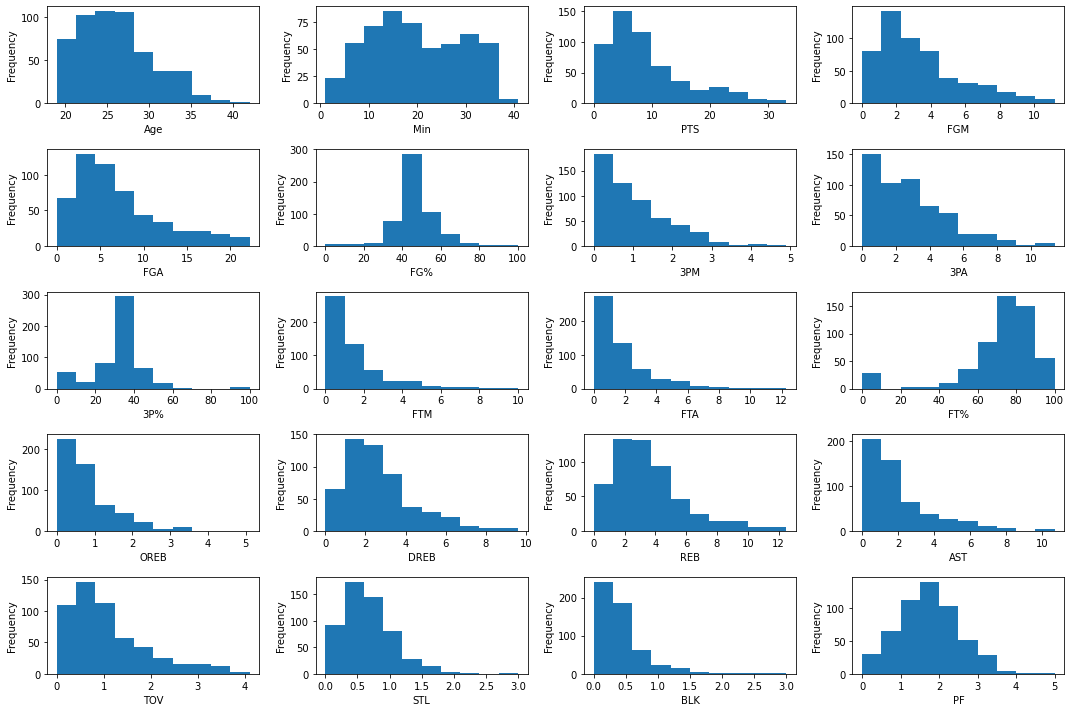

In [11]:
num_rows = 5
num_cols = 4

# Create subplots for histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Generate histograms for all variables
for i, column in enumerate(df.columns[2:22]):
    ax = axes[i // num_cols, i % num_cols]  # Get the appropriate subplot
    ax.hist(df[column])
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

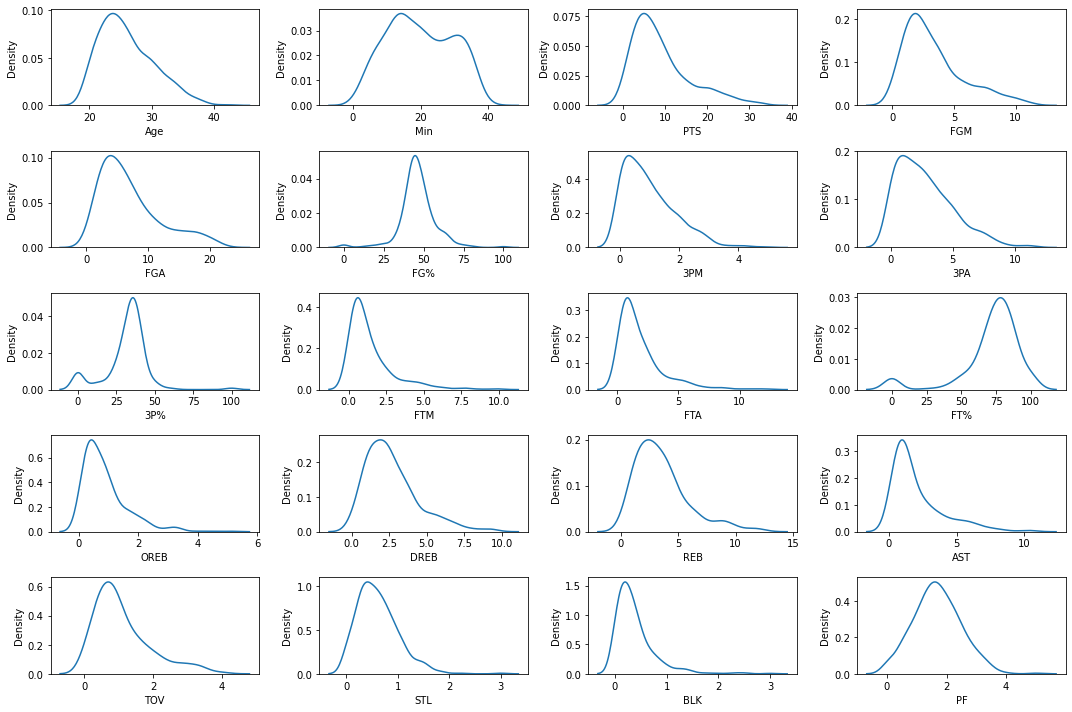

In [12]:
num_rows = 5
num_cols = 4

# Create subplots for histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Generate KDE plots for all variables
for i, column in enumerate(df.columns[2:22]):
    ax = axes[i // num_cols, i % num_cols]  # Get the appropriate subplot
    sns.kdeplot(data=df[column], ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

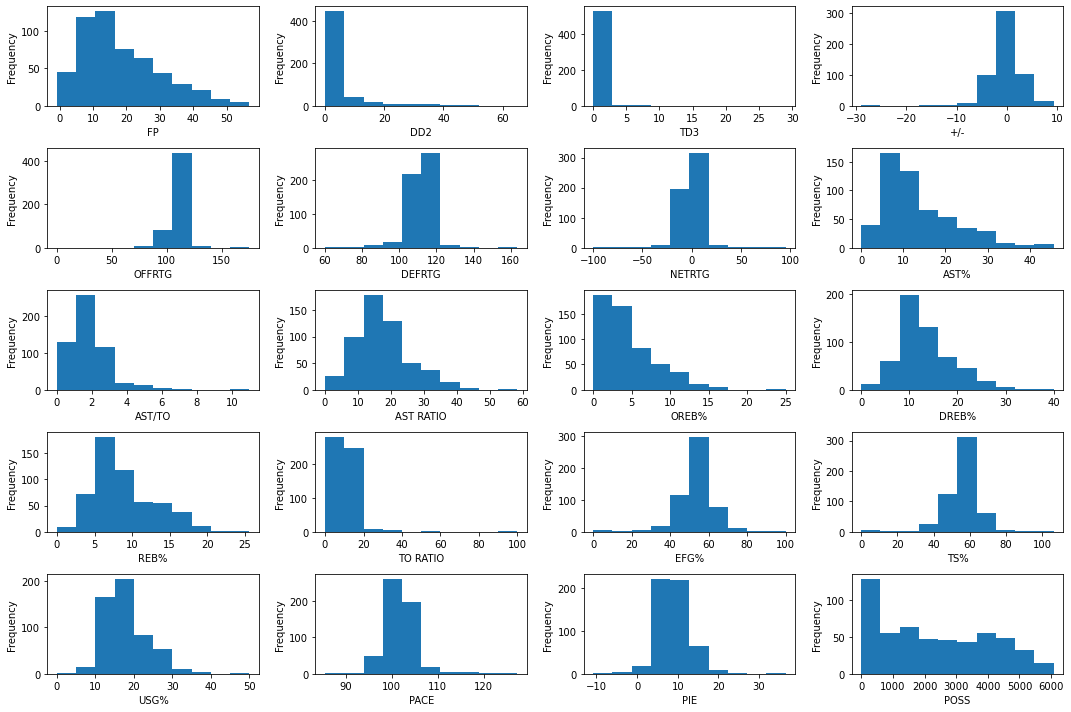

In [13]:
num_rows = 5
num_cols = 4

# Create subplots for histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Generate histograms for all variables
for i, column in enumerate(df.columns[22:42]):
    ax = axes[i // num_cols, i % num_cols]  # Get the appropriate subplot
    ax.hist(df[column])
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')


# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

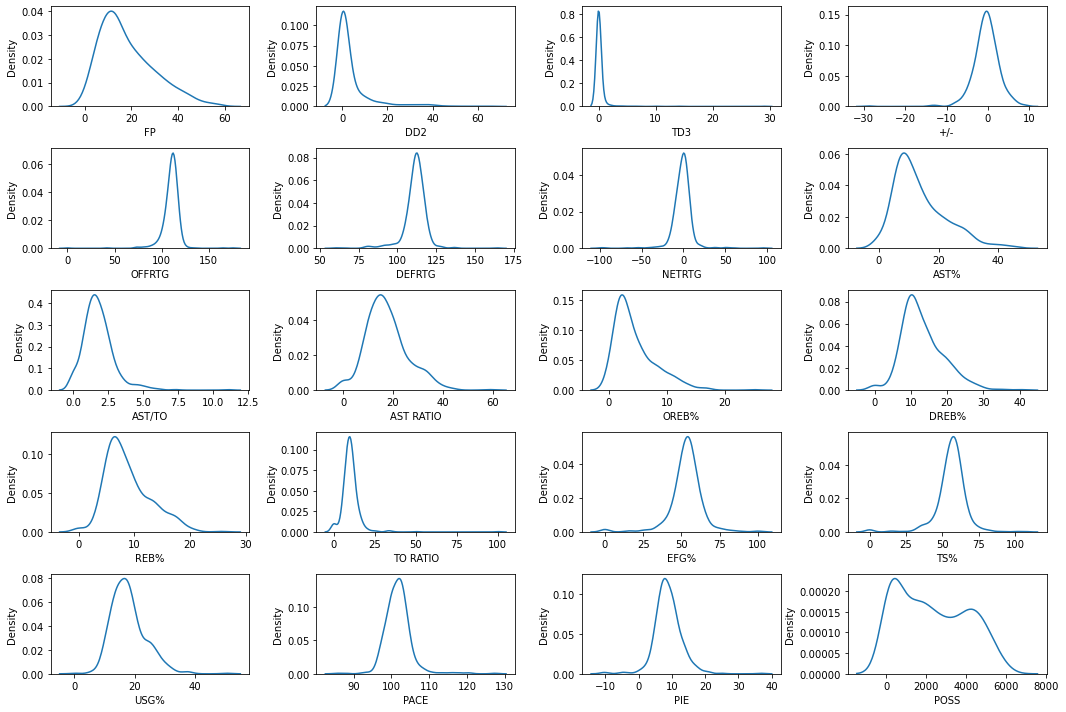

In [14]:
num_rows = 5
num_cols = 4

# Create subplots for histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Generate KDE plots for all variables
for i, column in enumerate(df.columns[22:42]):
    ax = axes[i // num_cols, i % num_cols]  # Get the appropriate subplot
    sns.kdeplot(data=df[column], ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Density')


# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

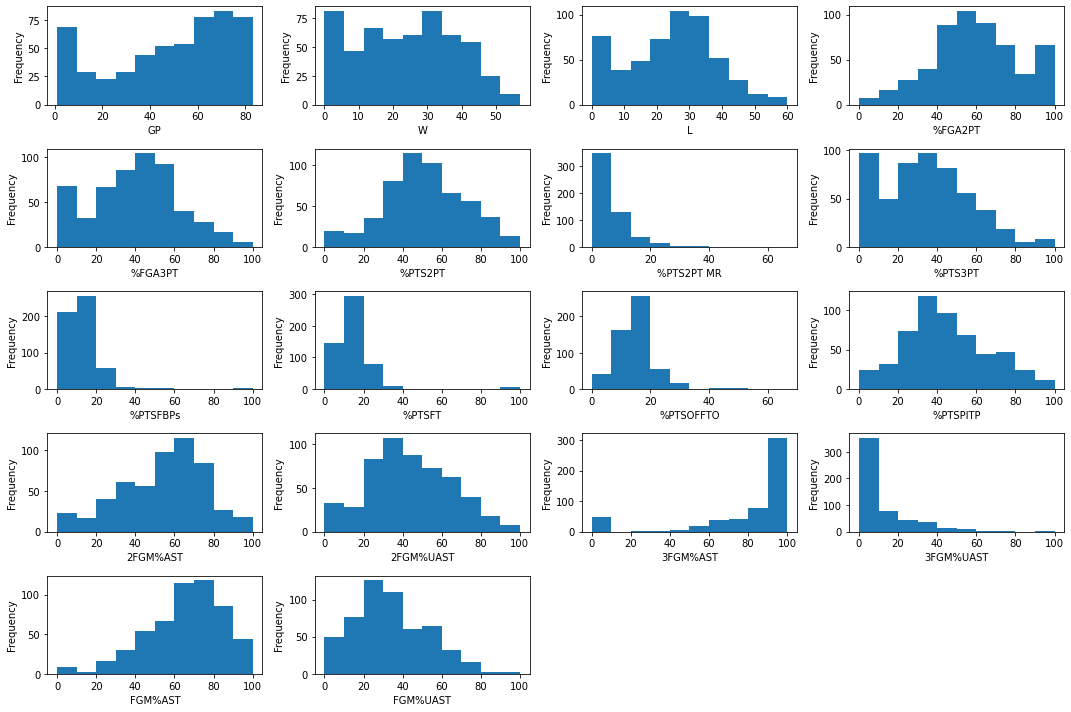

In [15]:
num_rows = 5
num_cols = 4

# Create subplots for histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Generate histograms for all variables
for i, column in enumerate(df.columns[42:]):
    ax = axes[i // num_cols, i % num_cols]  # Get the appropriate subplot
    ax.hist(df[column])
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide empty subplots
if i < num_rows * num_cols - 1:
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

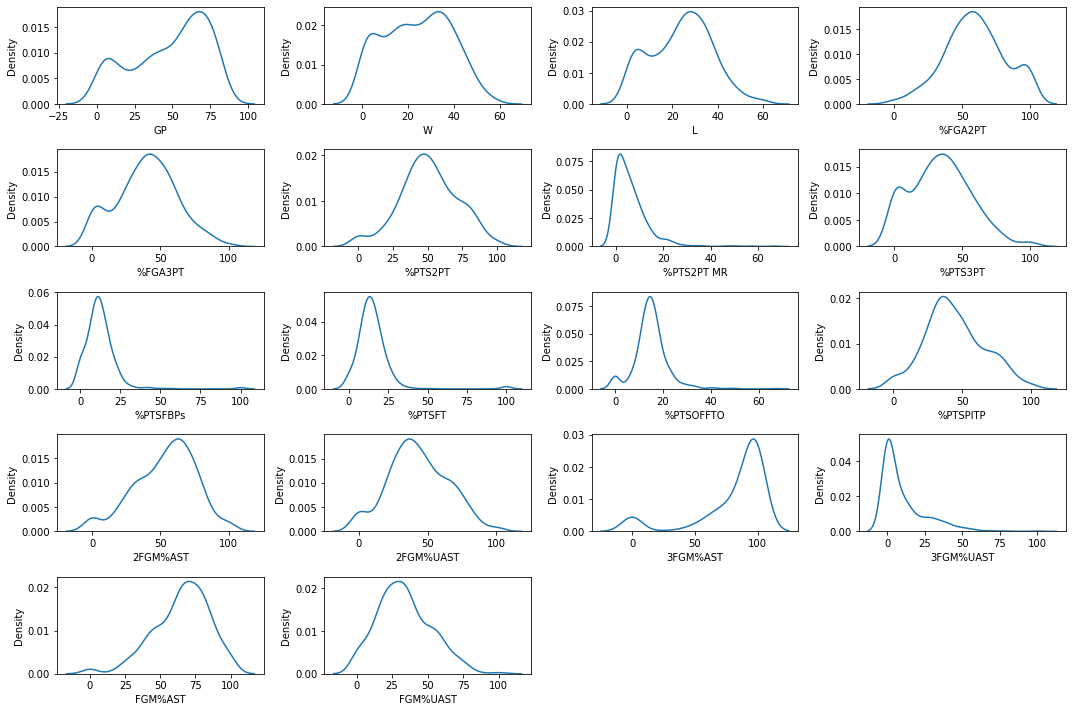

In [16]:
num_rows = 5
num_cols = 4

# Create subplots for histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Generate KDE plots for all variables
for i, column in enumerate(df.columns[42:]):
    ax = axes[i // num_cols, i % num_cols]  # Get the appropriate subplot
    sns.kdeplot(data=df[column], ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

# Hide empty subplots
if i < num_rows * num_cols - 1:
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

In [17]:
# If you want a closer look at each histogram, you can run this code. It will be commented out for now since there are many graphs

#for column in df.columns[2:]:
 #   plt.hist(df[column])
  #  plt.xlabel(column)
   # plt.ylabel('Frequency')
    #plt.show()

There are a number of things we can see from these graphs. Many of the offensive statistics are positively skewed. This makes sense given that there are rather few players that would have large amounts of points, rebounds, assists, etc. in a game. These players would be considered superstars, and there aren't that many in the league. There are also several variables that are not skewed or at least close to normal. These include DEFRTG, NETRTG, EFG%, TS%, PIE and PACE. There are other variables that are oddly distributed, such as W, POSS and Min. 

### Clustering

The main point of my project is to try to cluster the different players in the NBA based on their statistics from this past year. That involves some sort of clustering. I will try to just run the clusters and look at the labels of each, and later I will use dimension reduction to be able to visualize the clusters a little better. 

In [18]:
df.head()

Player Team  Age   Min   PTS   FGM   FGA   FG%  3PM   3PA  \
0              Joel Embiid  PHI   29  34.6  33.1  11.0  20.1  54.8  1.0   3.0   
1              Luka Doncic  DAL   24  36.2  32.4  10.9  22.0  49.6  2.8   8.2   
2           Damian Lillard  POR   32  36.3  32.2   9.6  20.7  46.3  4.2  11.3   
3  Shai Gilgeous-Alexander  OKC   24  35.5  31.4  10.4  20.3  51.0  0.9   2.5   
4    Giannis Antetokounmpo  MIL   28  32.1  31.1  11.2  20.3  55.3  0.7   2.7   

    3P%   FTM   FTA   FT%  OREB  DREB   REB  AST  TOV  STL  BLK   PF    FP  \
0  33.0  10.0  11.7  85.7   1.7   8.4  10.2  4.2  3.4  1.0  1.7  3.1  56.2   
1  34.2   7.8  10.5  74.2   0.8   7.8   8.6  8.0  3.6  1.4  0.5  2.5  56.8   
2  37.1   8.8   9.6  91.4   0.8   4.0   4.8  7.3  3.3  0.9  0.3  1.9  49.1   
3  34.5   9.8  10.9  90.5   0.9   4.0   4.8  5.5  2.8  1.6  1.0  2.8  50.4   
4  27.5   7.9  12.3  64.5   2.2   9.6  11.8  5.7  3.9  0.8  0.8  3.1  54.8   

    DD2   TD3  +/-  OFFRTG  DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  \
0  39.0   1.0  6.4   119.0   110.2     8.8  23.3    1.21       12.7    5.7   
1  36.0  10.0  1.9   118.1   116.0     2.1  40.8    2.24       21.1    2.4   
2  16.0   2.0  1.8   119.5   117.4     2.1  33.8    2.23       20.8    2.2   
3   3.0   0.0  2.2   116.1   113.3     2.7  24.9    1.93       16.4    2.3   
4  46.0   6.0  5.4   116.4   109.2     7.2  31.4    1.46       16.2    6.5   

   DREB%  REB%  TO RATIO  EFG%   TS%  USG%    PACE   PIE  POSS  GP   W   L  \
0   24.3  15.7      10.5  57.3  65.5  37.0   97.34  21.3  4639  66  43  23   
1   22.4  12.4       9.4  56.0  60.9  36.8   97.63  20.2  4874  66  33  33   
2   11.2   6.8       9.3  56.4  64.5  33.1   99.78  17.3  4385  58  27  31   
3   10.9   6.5       8.5  53.1  62.6  31.8  103.47  17.5  5211  68  33  35   
4   26.8  17.1      11.1  57.2  60.5  37.3  103.63  20.4  4380  63  47  16   

   %FGA2PT  %FGA3PT  %PTS2PT  %PTS2PT MR  %PTS3PT  %PTSFBPs  %PTSFT  \
0     84.9     15.1     60.7        15.7      9.1       6.3    30.2   
1     62.7     37.3     50.0         8.5     26.0       5.2    24.0   
2     45.3     54.7     33.4         6.0     39.2       8.6    27.4   
3     87.8     12.2     60.5         9.7      8.1      12.7    31.4   
4     86.6     13.4     67.4         7.0      7.2      17.5    25.4   

   %PTSOFFTO  %PTSPITP  2FGM%AST  2FGM%UAST  3FGM%AST  3FGM%UAST  FGM%AST  \
0       12.7      45.0      60.0       40.0      89.4       10.6     62.6   
1       14.0      41.4      13.1       86.9      21.6       78.4     15.3   
2       11.9      27.4      15.7       84.3      51.6       48.4     31.5   
3       17.7      50.8      20.1       79.9      31.0       69.0     21.0   
4       12.9      60.3      41.5       58.5      61.7       38.3     42.9   

   FGM%UAST  
0      37.4  
1      84.7  
2      68.5  
3      79.0  
4      57.1

In [19]:
#We need to drop all non-numeric columns. We will drop Player and Team.

df1 = df.drop(['Player', 'Team'], axis=1)

In [20]:
df1.head()

Age   Min   PTS   FGM   FGA   FG%  3PM   3PA   3P%   FTM   FTA   FT%  OREB  \
0   29  34.6  33.1  11.0  20.1  54.8  1.0   3.0  33.0  10.0  11.7  85.7   1.7   
1   24  36.2  32.4  10.9  22.0  49.6  2.8   8.2  34.2   7.8  10.5  74.2   0.8   
2   32  36.3  32.2   9.6  20.7  46.3  4.2  11.3  37.1   8.8   9.6  91.4   0.8   
3   24  35.5  31.4  10.4  20.3  51.0  0.9   2.5  34.5   9.8  10.9  90.5   0.9   
4   28  32.1  31.1  11.2  20.3  55.3  0.7   2.7  27.5   7.9  12.3  64.5   2.2   

   DREB   REB  AST  TOV  STL  BLK   PF    FP   DD2   TD3  +/-  OFFRTG  DEFRTG  \
0   8.4  10.2  4.2  3.4  1.0  1.7  3.1  56.2  39.0   1.0  6.4   119.0   110.2   
1   7.8   8.6  8.0  3.6  1.4  0.5  2.5  56.8  36.0  10.0  1.9   118.1   116.0   
2   4.0   4.8  7.3  3.3  0.9  0.3  1.9  49.1  16.0   2.0  1.8   119.5   117.4   
3   4.0   4.8  5.5  2.8  1.6  1.0  2.8  50.4   3.0   0.0  2.2   116.1   113.3   
4   9.6  11.8  5.7  3.9  0.8  0.8  3.1  54.8  46.0   6.0  5.4   116.4   109.2   

   NETRTG  AST%  AST/TO  AST RATIO  OREB%  DREB%  REB%  TO RATIO  EFG%   TS%  \
0     8.8  23.3    1.21       12.7    5.7   24.3  15.7      10.5  57.3  65.5   
1     2.1  40.8    2.24       21.1    2.4   22.4  12.4       9.4  56.0  60.9   
2     2.1  33.8    2.23       20.8    2.2   11.2   6.8       9.3  56.4  64.5   
3     2.7  24.9    1.93       16.4    2.3   10.9   6.5       8.5  53.1  62.6   
4     7.2  31.4    1.46       16.2    6.5   26.8  17.1      11.1  57.2  60.5   

   USG%    PACE   PIE  POSS  GP   W   L  %FGA2PT  %FGA3PT  %PTS2PT  \
0  37.0   97.34  21.3  4639  66  43  23     84.9     15.1     60.7   
1  36.8   97.63  20.2  4874  66  33  33     62.7     37.3     50.0   
2  33.1   99.78  17.3  4385  58  27  31     45.3     54.7     33.4   
3  31.8  103.47  17.5  5211  68  33  35     87.8     12.2     60.5   
4  37.3  103.63  20.4  4380  63  47  16     86.6     13.4     67.4   

   %PTS2PT MR  %PTS3PT  %PTSFBPs  %PTSFT  %PTSOFFTO  %PTSPITP  2FGM%AST  \
0        15.7      9.1       6.3    30.2       12.7      45.0      60.0   
1         8.5     26.0       5.2    24.0       14.0      41.4      13.1   
2         6.0     39.2       8.6    27.4       11.9      27.4      15.7   
3         9.7      8.1      12.7    31.4       17.7      50.8      20.1   
4         7.0      7.2      17.5    25.4       12.9      60.3      41.5   

   2FGM%UAST  3FGM%AST  3FGM%UAST  FGM%AST  FGM%UAST  
0       40.0      89.4       10.6     62.6      37.4  
1       86.9      21.6       78.4     15.3      84.7  
2       84.3      51.6       48.4     31.5      68.5  
3       79.9      31.0       69.0     21.0      79.0  
4       58.5      61.7       38.3     42.9      57.1

In [21]:
# Next we need to standardize the data since clustering is sensitive to scale. I will use standard scaler

scaler = StandardScaler()
X = scaler.fit_transform(df1)

The common way of determining the correct number of clusters for kmeans clustering is the elbow method. However, the elbow method may not always be the most accurate, particularly when the number of clusters is high. The Calinski-Harabasz score, Davies-Bouldin score and the Silhouette score can all give a more accurate number of clusters. I will run each of the four methods here, and I will compare. Check out the Sklearn notes for each of these and other methods under clustering metrics: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In addition, check out this blog post: https://towardsdatascience.com/are-you-still-using-the-elbow-method-5d271b3063bd
This was one of the main reasons I chose the metrics I used. Because we don't have the true labels, many of the other clustering metrics don't work. That's why I chose the three scores given above 

In [22]:
wcss = []
ch_scores = []
db_scores = []
s_scores = []

for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 9)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
    db_scores.append(davies_bouldin_score(X, kmeans.labels_))
    s_scores.append(silhouette_score(X, kmeans.labels_))

C:\Users\tfurr\AppData\Local\Temp\ipykernel_4064\2825464523.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


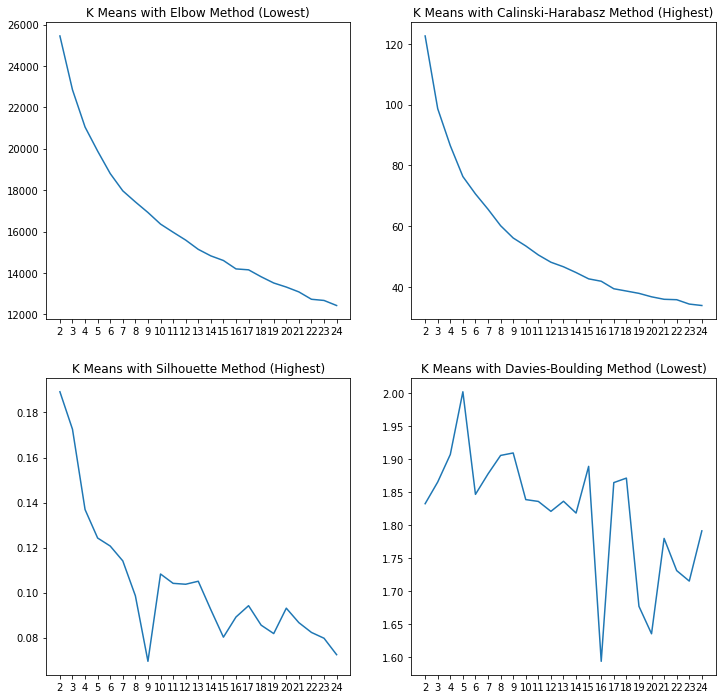

In [23]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0,0].plot(range(2, 25), wcss)
ax[0,0].set_title('K Means with Elbow Method (Lowest)')
ax[0,0].set_xticks(range(2,25))
ax[0,1].plot(range(2, 25), ch_scores)
ax[0,1].set_title('K Means with Calinski-Harabasz Method (Highest)')
ax[0,1].set_xticks(range(2,25))
ax[1,0].plot(range(2, 25), s_scores)
ax[1,0].set_title('K Means with Silhouette Method (Highest)')
ax[1,0].set_xticks(range(2,25))
ax[1,1].plot(range(2, 25), db_scores)
ax[1,1].set_title('K Means with Davies-Boulding Method (Lowest)')
ax[1,1].set_xticks(range(2,25))

fig.show()

The four methods don't come to a concensus on the correct number of clusters, though they don't necessarily need to. The thing that concerns me is that none of them are even close. The elbow method is smooth and curved, with no distinct "elbow". The same can be said for the Calinski-Harabasz method. The silhouette method recommends anything from 2 to 5 and maybe 10. The Davies-Boulding method recommends 16 or 20. I suspect there are issues here that we can address, so I'm not even going to perform the clustering here. We already know there are variables that are highly correlated. So I will perform PCA and later on I will also filter the data. 

### Using PCA and clustering

In [24]:
pca1 = PCA(n_components=25)
X_pca1 = pca1.fit_transform(X)

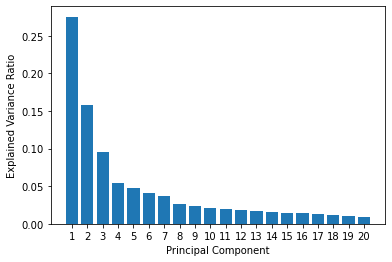

In [25]:
plt.bar(range(1, 21), pca1.explained_variance_ratio_[0:20])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, 21))
plt.show()

In [26]:
pca1.explained_variance_ratio_

array([0.27536352, 0.15784169, 0.09534806, 0.05414205, 0.04786986,
       0.04062998, 0.03685692, 0.02583204, 0.02390873, 0.02093006,
       0.02021895, 0.01858952, 0.01674272, 0.01608989, 0.01456463,
       0.01396763, 0.01317754, 0.01155616, 0.01024437, 0.00932619,
       0.00839855, 0.0079888 , 0.00736582, 0.00689754, 0.00620988])

The first 3 components explain almost 53% of the variation in the data so I will just use those 3. You could make an argument for other numbers as well such as 2 or 4. I feel comfortable with the first 3. 

In [27]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [28]:
# This is the same as above. I get the 4 scores and plot them for this new PCA data

wcss = []
ch_scores = []
db_scores = []
s_scores = []

for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 9)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    ch_scores.append(calinski_harabasz_score(X_pca, kmeans.labels_))
    db_scores.append(davies_bouldin_score(X_pca, kmeans.labels_))
    s_scores.append(silhouette_score(X_pca, kmeans.labels_))

C:\Users\tfurr\AppData\Local\Temp\ipykernel_4064\2825464523.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


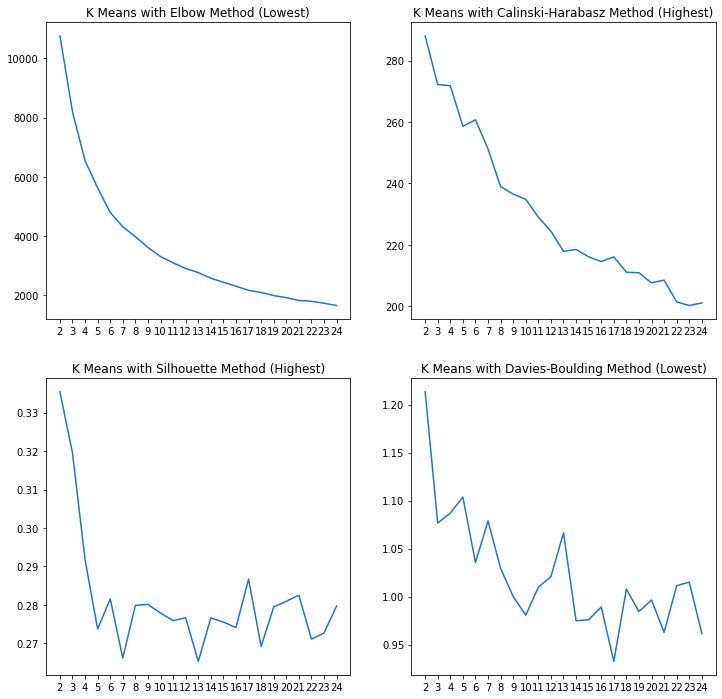

In [29]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0,0].plot(range(2, 25), wcss)
ax[0,0].set_title('K Means with Elbow Method (Lowest)')
ax[0,0].set_xticks(range(2,25))
ax[0,1].plot(range(2, 25), ch_scores)
ax[0,1].set_title('K Means with Calinski-Harabasz Method (Highest)')
ax[0,1].set_xticks(range(2,25))
ax[1,0].plot(range(2, 25), s_scores)
ax[1,0].set_title('K Means with Silhouette Method (Highest)')
ax[1,0].set_xticks(range(2,25))
ax[1,1].plot(range(2, 25), db_scores)
ax[1,1].set_title('K Means with Davies-Boulding Method (Lowest)')
ax[1,1].set_xticks(range(2,25))

fig.show()

Performing PCA has given a more concrete answer to the number of clusters. The elbow method might give about 6, though it's still pretty smooth. However, the other 3 methods all have definitive spikes in their respective directions at 6. In addition, the bottom two methods both have distinctive spikes at 17. I will look at the clustering with both 6 and 17 clusters. 

In [30]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_pca)

labels6 = kmeans.labels_

df['labels_6'] = labels6

kmeans2 = KMeans(n_clusters=17)
kmeans2.fit(X_pca)

labels17 = kmeans2.labels_

df['labels_17'] = labels17

In [31]:
# Make sure it looks correct
df.head()

Player Team  Age   Min   PTS   FGM   FGA   FG%  3PM   3PA  \
0              Joel Embiid  PHI   29  34.6  33.1  11.0  20.1  54.8  1.0   3.0   
1              Luka Doncic  DAL   24  36.2  32.4  10.9  22.0  49.6  2.8   8.2   
2           Damian Lillard  POR   32  36.3  32.2   9.6  20.7  46.3  4.2  11.3   
3  Shai Gilgeous-Alexander  OKC   24  35.5  31.4  10.4  20.3  51.0  0.9   2.5   
4    Giannis Antetokounmpo  MIL   28  32.1  31.1  11.2  20.3  55.3  0.7   2.7   

    3P%   FTM   FTA   FT%  OREB  DREB   REB  AST  TOV  STL  BLK   PF    FP  \
0  33.0  10.0  11.7  85.7   1.7   8.4  10.2  4.2  3.4  1.0  1.7  3.1  56.2   
1  34.2   7.8  10.5  74.2   0.8   7.8   8.6  8.0  3.6  1.4  0.5  2.5  56.8   
2  37.1   8.8   9.6  91.4   0.8   4.0   4.8  7.3  3.3  0.9  0.3  1.9  49.1   
3  34.5   9.8  10.9  90.5   0.9   4.0   4.8  5.5  2.8  1.6  1.0  2.8  50.4   
4  27.5   7.9  12.3  64.5   2.2   9.6  11.8  5.7  3.9  0.8  0.8  3.1  54.8   

    DD2   TD3  +/-  OFFRTG  DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  \
0  39.0   1.0  6.4   119.0   110.2     8.8  23.3    1.21       12.7    5.7   
1  36.0  10.0  1.9   118.1   116.0     2.1  40.8    2.24       21.1    2.4   
2  16.0   2.0  1.8   119.5   117.4     2.1  33.8    2.23       20.8    2.2   
3   3.0   0.0  2.2   116.1   113.3     2.7  24.9    1.93       16.4    2.3   
4  46.0   6.0  5.4   116.4   109.2     7.2  31.4    1.46       16.2    6.5   

   DREB%  REB%  TO RATIO  EFG%   TS%  USG%    PACE   PIE  POSS  GP   W   L  \
0   24.3  15.7      10.5  57.3  65.5  37.0   97.34  21.3  4639  66  43  23   
1   22.4  12.4       9.4  56.0  60.9  36.8   97.63  20.2  4874  66  33  33   
2   11.2   6.8       9.3  56.4  64.5  33.1   99.78  17.3  4385  58  27  31   
3   10.9   6.5       8.5  53.1  62.6  31.8  103.47  17.5  5211  68  33  35   
4   26.8  17.1      11.1  57.2  60.5  37.3  103.63  20.4  4380  63  47  16   

   %FGA2PT  %FGA3PT  %PTS2PT  %PTS2PT MR  %PTS3PT  %PTSFBPs  %PTSFT  \
0     84.9     15.1     60.7        15.7      9.1       6.3    30.2   
1     62.7     37.3     50.0         8.5     26.0       5.2    24.0   
2     45.3     54.7     33.4         6.0     39.2       8.6    27.4   
3     87.8     12.2     60.5         9.7      8.1      12.7    31.4   
4     86.6     13.4     67.4         7.0      7.2      17.5    25.4   

   %PTSOFFTO  %PTSPITP  2FGM%AST  2FGM%UAST  3FGM%AST  3FGM%UAST  FGM%AST  \
0       12.7      45.0      60.0       40.0      89.4       10.6     62.6   
1       14.0      41.4      13.1       86.9      21.6       78.4     15.3   
2       11.9      27.4      15.7       84.3      51.6       48.4     31.5   
3       17.7      50.8      20.1       79.9      31.0       69.0     21.0   
4       12.9      60.3      41.5       58.5      61.7       38.3     42.9   

   FGM%UAST  labels_6  labels_17  
0      37.4         4         13  
1      84.7         4          1  
2      68.5         4          1  
3      79.0         4          1  
4      57.1         4         13

In [32]:
df['labels_6'].value_counts() # See how many are in each

2    141
0    124
1     84
3     71
5     61
4     58
Name: labels_6, dtype: int64

In [33]:
df['labels_17'].value_counts() # See how many are in each

0     50
7     49
4     49
6     40
16    38
5     37
12    37
9     35
11    35
3     35
1     33
14    30
2     21
15    18
10    15
13    11
8      6
Name: labels_17, dtype: int64

In [34]:
df.loc[df['labels_6'] == 1, 'Player'] # Look at some of the players. 

160        Jeenathan Williams
199            Hamidou Diallo
208             Jae'Sean Tate
237        Aleksej Pokusevski
253               T.J. Warren
                ...          
512    Thanasis Antetokounmpo
514               Braxton Key
516             Tyrese Martin
522               Noah Vonleh
523              Chima Moneke
Name: Player, Length: 84, dtype: object

In [35]:
# This creates a new dataframe that we will use for the visualizations. Includes the player names, the PCA components and the cluster labels for 6 and 17
df_new = pd.DataFrame({'Player': df.Player, 'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'PC3': X_pca[:, 2], 'Cluster6': df.labels_6, 'Cluster17':df.labels_17})

In [36]:
# Make sure the cluster labels are categorical 
df_new['Cluster6'] = df_new['Cluster6'].astype('category')
df_new['Cluster17'] = df_new['Cluster17'].astype('category')

In [37]:
fig = px.scatter(df_new, x='PC1', y='PC2', color='Cluster6', hover_data=['Player'],
                 title="2023 NBA Regular Season Stats Clustering with 6 clusters on 2 Components")

fig.show()

In [38]:
fig = px.scatter(df_new, x='PC1', y='PC2', color='Cluster17', hover_data=['Player'],
                 title="2023 NBA Regular Season Stats Clustering with 17 clusters on 2 Components",
                color_discrete_sequence=px.colors.qualitative.Alphabet)

fig.show()

I did include all 3 components in the data, so we may as well look at the 3d version

In [39]:
fig = px.scatter_3d(df_new, x='PC1', y='PC2',z='PC3', color='Cluster6', hover_data=['Player'],
                 title="2023 NBA Regular Season Stats Clustering with 6 clusters on 3 Components")

fig.show()

In [40]:
fig = px.scatter_3d(df_new, x='PC1', y='PC2', z='PC3', color='Cluster17', hover_data=['Player'],
                    title="2023 NBA Regular Season Stats Clustering with 17 clusters on 3 Components",
                    color_discrete_sequence=px.colors.qualitative.Alphabet)

fig.show()

All 4 of these graphs show interesting trends amongst the data. I am not attempting to label any of these clusters, though we could do that. I won't pretend I know enough about the intricate nature of basketball or all the players that played this year. However, I can tell that in the graphs with 6 clusters, cluster 2 would probably be considered high rebounding, traditional big men, cluster 5 would be "superstars" clusters 0 and 3 would probably be more "role players" and clusters 1 and 4 would likely be players that don't play as much. With the 17 clusters it's much more difficult for me to define. However, it's interesting to look at who is in each cluster. 

### Running clustering with filtered data

One of the issues I can see is that there a number of players who don't play much. I said before I would filter out these players, but I wanted to see what the clusters would look like with those players in the data set. I will now filter out those players.

In [41]:
df.head()

Player Team  Age   Min   PTS   FGM   FGA   FG%  3PM   3PA  \
0              Joel Embiid  PHI   29  34.6  33.1  11.0  20.1  54.8  1.0   3.0   
1              Luka Doncic  DAL   24  36.2  32.4  10.9  22.0  49.6  2.8   8.2   
2           Damian Lillard  POR   32  36.3  32.2   9.6  20.7  46.3  4.2  11.3   
3  Shai Gilgeous-Alexander  OKC   24  35.5  31.4  10.4  20.3  51.0  0.9   2.5   
4    Giannis Antetokounmpo  MIL   28  32.1  31.1  11.2  20.3  55.3  0.7   2.7   

    3P%   FTM   FTA   FT%  OREB  DREB   REB  AST  TOV  STL  BLK   PF    FP  \
0  33.0  10.0  11.7  85.7   1.7   8.4  10.2  4.2  3.4  1.0  1.7  3.1  56.2   
1  34.2   7.8  10.5  74.2   0.8   7.8   8.6  8.0  3.6  1.4  0.5  2.5  56.8   
2  37.1   8.8   9.6  91.4   0.8   4.0   4.8  7.3  3.3  0.9  0.3  1.9  49.1   
3  34.5   9.8  10.9  90.5   0.9   4.0   4.8  5.5  2.8  1.6  1.0  2.8  50.4   
4  27.5   7.9  12.3  64.5   2.2   9.6  11.8  5.7  3.9  0.8  0.8  3.1  54.8   

    DD2   TD3  +/-  OFFRTG  DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  \
0  39.0   1.0  6.4   119.0   110.2     8.8  23.3    1.21       12.7    5.7   
1  36.0  10.0  1.9   118.1   116.0     2.1  40.8    2.24       21.1    2.4   
2  16.0   2.0  1.8   119.5   117.4     2.1  33.8    2.23       20.8    2.2   
3   3.0   0.0  2.2   116.1   113.3     2.7  24.9    1.93       16.4    2.3   
4  46.0   6.0  5.4   116.4   109.2     7.2  31.4    1.46       16.2    6.5   

   DREB%  REB%  TO RATIO  EFG%   TS%  USG%    PACE   PIE  POSS  GP   W   L  \
0   24.3  15.7      10.5  57.3  65.5  37.0   97.34  21.3  4639  66  43  23   
1   22.4  12.4       9.4  56.0  60.9  36.8   97.63  20.2  4874  66  33  33   
2   11.2   6.8       9.3  56.4  64.5  33.1   99.78  17.3  4385  58  27  31   
3   10.9   6.5       8.5  53.1  62.6  31.8  103.47  17.5  5211  68  33  35   
4   26.8  17.1      11.1  57.2  60.5  37.3  103.63  20.4  4380  63  47  16   

   %FGA2PT  %FGA3PT  %PTS2PT  %PTS2PT MR  %PTS3PT  %PTSFBPs  %PTSFT  \
0     84.9     15.1     60.7        15.7      9.1       6.3    30.2   
1     62.7     37.3     50.0         8.5     26.0       5.2    24.0   
2     45.3     54.7     33.4         6.0     39.2       8.6    27.4   
3     87.8     12.2     60.5         9.7      8.1      12.7    31.4   
4     86.6     13.4     67.4         7.0      7.2      17.5    25.4   

   %PTSOFFTO  %PTSPITP  2FGM%AST  2FGM%UAST  3FGM%AST  3FGM%UAST  FGM%AST  \
0       12.7      45.0      60.0       40.0      89.4       10.6     62.6   
1       14.0      41.4      13.1       86.9      21.6       78.4     15.3   
2       11.9      27.4      15.7       84.3      51.6       48.4     31.5   
3       17.7      50.8      20.1       79.9      31.0       69.0     21.0   
4       12.9      60.3      41.5       58.5      61.7       38.3     42.9   

   FGM%UAST  labels_6  labels_17  
0      37.4         4         13  
1      84.7         4          1  
2      68.5         4          1  
3      79.0         4          1  
4      57.1         4         13

There's a definitive problem in figuring out where the threshold is for players to be kept in the dataset. I landed on 21 games played and 8 minutes per game. In this sense, the player must have played over a quarter of the games of the NBA season and played at least a sixth of the minutes per game. You could certainly make the case for other numbers as well. I felt this was a reasonable amount that would eliminate garbage time players and players that were injured for most of the season.

In [42]:
filtered_df = df[(df['GP'] > 21) & (df['Min'] > 8)].copy()
filtered_df1 = filtered_df.drop(['Player', 'Team', 'labels_6', 'labels_17'], axis=1)

In [43]:
filtered_df1.head() # Take a look

Age   Min   PTS   FGM   FGA   FG%  3PM   3PA   3P%   FTM   FTA   FT%  OREB  \
0   29  34.6  33.1  11.0  20.1  54.8  1.0   3.0  33.0  10.0  11.7  85.7   1.7   
1   24  36.2  32.4  10.9  22.0  49.6  2.8   8.2  34.2   7.8  10.5  74.2   0.8   
2   32  36.3  32.2   9.6  20.7  46.3  4.2  11.3  37.1   8.8   9.6  91.4   0.8   
3   24  35.5  31.4  10.4  20.3  51.0  0.9   2.5  34.5   9.8  10.9  90.5   0.9   
4   28  32.1  31.1  11.2  20.3  55.3  0.7   2.7  27.5   7.9  12.3  64.5   2.2   

   DREB   REB  AST  TOV  STL  BLK   PF    FP   DD2   TD3  +/-  OFFRTG  DEFRTG  \
0   8.4  10.2  4.2  3.4  1.0  1.7  3.1  56.2  39.0   1.0  6.4   119.0   110.2   
1   7.8   8.6  8.0  3.6  1.4  0.5  2.5  56.8  36.0  10.0  1.9   118.1   116.0   
2   4.0   4.8  7.3  3.3  0.9  0.3  1.9  49.1  16.0   2.0  1.8   119.5   117.4   
3   4.0   4.8  5.5  2.8  1.6  1.0  2.8  50.4   3.0   0.0  2.2   116.1   113.3   
4   9.6  11.8  5.7  3.9  0.8  0.8  3.1  54.8  46.0   6.0  5.4   116.4   109.2   

   NETRTG  AST%  AST/TO  AST RATIO  OREB%  DREB%  REB%  TO RATIO  EFG%   TS%  \
0     8.8  23.3    1.21       12.7    5.7   24.3  15.7      10.5  57.3  65.5   
1     2.1  40.8    2.24       21.1    2.4   22.4  12.4       9.4  56.0  60.9   
2     2.1  33.8    2.23       20.8    2.2   11.2   6.8       9.3  56.4  64.5   
3     2.7  24.9    1.93       16.4    2.3   10.9   6.5       8.5  53.1  62.6   
4     7.2  31.4    1.46       16.2    6.5   26.8  17.1      11.1  57.2  60.5   

   USG%    PACE   PIE  POSS  GP   W   L  %FGA2PT  %FGA3PT  %PTS2PT  \
0  37.0   97.34  21.3  4639  66  43  23     84.9     15.1     60.7   
1  36.8   97.63  20.2  4874  66  33  33     62.7     37.3     50.0   
2  33.1   99.78  17.3  4385  58  27  31     45.3     54.7     33.4   
3  31.8  103.47  17.5  5211  68  33  35     87.8     12.2     60.5   
4  37.3  103.63  20.4  4380  63  47  16     86.6     13.4     67.4   

   %PTS2PT MR  %PTS3PT  %PTSFBPs  %PTSFT  %PTSOFFTO  %PTSPITP  2FGM%AST  \
0        15.7      9.1       6.3    30.2       12.7      45.0      60.0   
1         8.5     26.0       5.2    24.0       14.0      41.4      13.1   
2         6.0     39.2       8.6    27.4       11.9      27.4      15.7   
3         9.7      8.1      12.7    31.4       17.7      50.8      20.1   
4         7.0      7.2      17.5    25.4       12.9      60.3      41.5   

   2FGM%UAST  3FGM%AST  3FGM%UAST  FGM%AST  FGM%UAST  
0       40.0      89.4       10.6     62.6      37.4  
1       86.9      21.6       78.4     15.3      84.7  
2       84.3      51.6       48.4     31.5      68.5  
3       79.9      31.0       69.0     21.0      79.0  
4       58.5      61.7       38.3     42.9      57.1

In [44]:
filtered_df1.info() # Make sure we have 416 players

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 481
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         416 non-null    int64  
 1   Min         416 non-null    float64
 2   PTS         416 non-null    float64
 3   FGM         416 non-null    float64
 4   FGA         416 non-null    float64
 5   FG%         416 non-null    float64
 6   3PM         416 non-null    float64
 7   3PA         416 non-null    float64
 8   3P%         416 non-null    float64
 9   FTM         416 non-null    float64
 10  FTA         416 non-null    float64
 11  FT%         416 non-null    float64
 12  OREB        416 non-null    float64
 13  DREB        416 non-null    float64
 14  REB         416 non-null    float64
 15  AST         416 non-null    float64
 16  TOV         416 non-null    float64
 17  STL         416 non-null    float64
 18  BLK         416 non-null    float64
 19  PF          416 non-null    f

We will do the same scaling, as well as scoring and visualizations to determine how many clusters we should include

In [45]:
scaler = StandardScaler()
filtered_X = scaler.fit_transform(filtered_df1)

In [46]:
wcss = []
ch_scores = []
db_scores = []
s_scores = []

for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 9)
    kmeans.fit(filtered_X)
    wcss.append(kmeans.inertia_)
    ch_scores.append(calinski_harabasz_score(filtered_X, kmeans.labels_))
    db_scores.append(davies_bouldin_score(filtered_X, kmeans.labels_))
    s_scores.append(silhouette_score(filtered_X, kmeans.labels_))

C:\Users\tfurr\AppData\Local\Temp\ipykernel_4064\2825464523.py:16: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



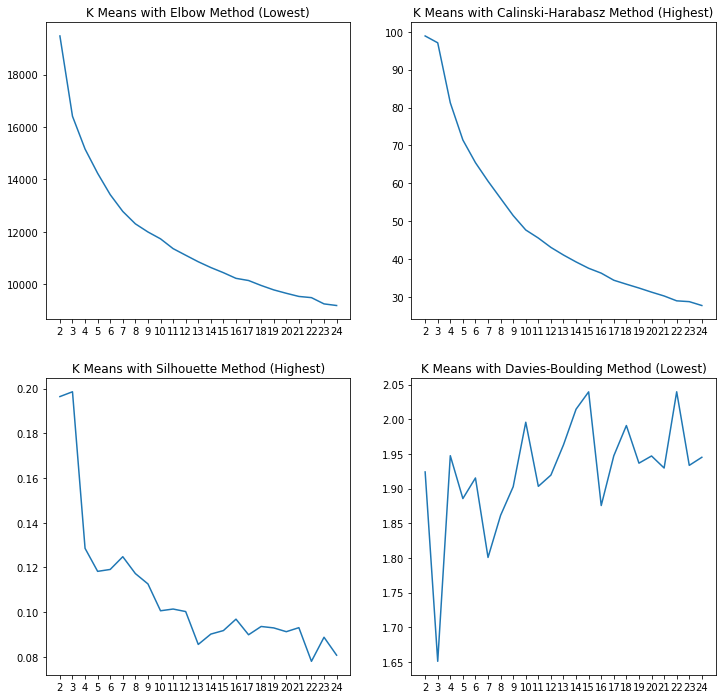

In [47]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0,0].plot(range(2, 25), wcss)
ax[0,0].set_title('K Means with Elbow Method (Lowest)')
ax[0,0].set_xticks(range(2,25))
ax[0,1].plot(range(2, 25), ch_scores)
ax[0,1].set_title('K Means with Calinski-Harabasz Method (Highest)')
ax[0,1].set_xticks(range(2,25))
ax[1,0].plot(range(2, 25), s_scores)
ax[1,0].set_title('K Means with Silhouette Method (Highest)')
ax[1,0].set_xticks(range(2,25))
ax[1,1].plot(range(2, 25), db_scores)
ax[1,1].set_title('K Means with Davies-Boulding Method (Lowest)')
ax[1,1].set_xticks(range(2,25))

fig.show()

This is really encouraging. By filtering out the players that don't play much, the elbow method has a little more of an elbow at 3 (though it's still pretty smooth), and the other 3 methods all point to 3 clusters. While the Davies-Boulding method suggests 15 or 18 as well, I will stick with 3

In [48]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(filtered_X)

labels3 = kmeans.labels_ # Save the labels

# Use this line to make sure a warning does not appear as a copy of a slice
filtered_df.loc[:, 'labels_3'] = labels3

In [49]:
filtered_df['labels_3'] = filtered_df['labels_3'].astype('category') # make sure these are categorical

Let's look at some of the players in each of the clusters

In [50]:
filtered_df.loc[filtered_df['labels_3'] == 1, 'Player']

16         Anthony Davis
50           Bam Adebayo
64     Jaren Jackson Jr.
67         Deandre Ayton
68          Myles Turner
             ...        
448     Christian Koloko
451       Richaun Holmes
453          Robin Lopez
459         Usman Garuba
469       Moussa Diabate
Name: Player, Length: 92, dtype: object

In [51]:
filtered_df.loc[filtered_df['labels_3'] == 0, 'Player']

71     Michael Porter Jr.
74         Andrew Wiggins
87        P.J. Washington
88        Cameron Johnson
89        De'Andre Hunter
              ...        
468       Kessler Edwards
473             Ish Smith
476       Jeff Dowtin Jr.
478           Theo Pinson
481         Trent Forrest
Name: Player, Length: 216, dtype: object

In [52]:
filtered_df.loc[filtered_df['labels_3'] == 2, 'Player']

0                  Joel Embiid
1                  Luka Doncic
2               Damian Lillard
3      Shai Gilgeous-Alexander
4        Giannis Antetokounmpo
                ...           
166              Cameron Payne
167               Monte Morris
185                  Josh Hart
197              Kyle Anderson
224             T.J. McConnell
Name: Player, Length: 108, dtype: object

In [53]:
filtered_df.head() # Take a look

Player Team  Age   Min   PTS   FGM   FGA   FG%  3PM   3PA  \
0              Joel Embiid  PHI   29  34.6  33.1  11.0  20.1  54.8  1.0   3.0   
1              Luka Doncic  DAL   24  36.2  32.4  10.9  22.0  49.6  2.8   8.2   
2           Damian Lillard  POR   32  36.3  32.2   9.6  20.7  46.3  4.2  11.3   
3  Shai Gilgeous-Alexander  OKC   24  35.5  31.4  10.4  20.3  51.0  0.9   2.5   
4    Giannis Antetokounmpo  MIL   28  32.1  31.1  11.2  20.3  55.3  0.7   2.7   

    3P%   FTM   FTA   FT%  OREB  DREB   REB  AST  TOV  STL  BLK   PF    FP  \
0  33.0  10.0  11.7  85.7   1.7   8.4  10.2  4.2  3.4  1.0  1.7  3.1  56.2   
1  34.2   7.8  10.5  74.2   0.8   7.8   8.6  8.0  3.6  1.4  0.5  2.5  56.8   
2  37.1   8.8   9.6  91.4   0.8   4.0   4.8  7.3  3.3  0.9  0.3  1.9  49.1   
3  34.5   9.8  10.9  90.5   0.9   4.0   4.8  5.5  2.8  1.6  1.0  2.8  50.4   
4  27.5   7.9  12.3  64.5   2.2   9.6  11.8  5.7  3.9  0.8  0.8  3.1  54.8   

    DD2   TD3  +/-  OFFRTG  DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  \
0  39.0   1.0  6.4   119.0   110.2     8.8  23.3    1.21       12.7    5.7   
1  36.0  10.0  1.9   118.1   116.0     2.1  40.8    2.24       21.1    2.4   
2  16.0   2.0  1.8   119.5   117.4     2.1  33.8    2.23       20.8    2.2   
3   3.0   0.0  2.2   116.1   113.3     2.7  24.9    1.93       16.4    2.3   
4  46.0   6.0  5.4   116.4   109.2     7.2  31.4    1.46       16.2    6.5   

   DREB%  REB%  TO RATIO  EFG%   TS%  USG%    PACE   PIE  POSS  GP   W   L  \
0   24.3  15.7      10.5  57.3  65.5  37.0   97.34  21.3  4639  66  43  23   
1   22.4  12.4       9.4  56.0  60.9  36.8   97.63  20.2  4874  66  33  33   
2   11.2   6.8       9.3  56.4  64.5  33.1   99.78  17.3  4385  58  27  31   
3   10.9   6.5       8.5  53.1  62.6  31.8  103.47  17.5  5211  68  33  35   
4   26.8  17.1      11.1  57.2  60.5  37.3  103.63  20.4  4380  63  47  16   

   %FGA2PT  %FGA3PT  %PTS2PT  %PTS2PT MR  %PTS3PT  %PTSFBPs  %PTSFT  \
0     84.9     15.1     60.7        15.7      9.1       6.3    30.2   
1     62.7     37.3     50.0         8.5     26.0       5.2    24.0   
2     45.3     54.7     33.4         6.0     39.2       8.6    27.4   
3     87.8     12.2     60.5         9.7      8.1      12.7    31.4   
4     86.6     13.4     67.4         7.0      7.2      17.5    25.4   

   %PTSOFFTO  %PTSPITP  2FGM%AST  2FGM%UAST  3FGM%AST  3FGM%UAST  FGM%AST  \
0       12.7      45.0      60.0       40.0      89.4       10.6     62.6   
1       14.0      41.4      13.1       86.9      21.6       78.4     15.3   
2       11.9      27.4      15.7       84.3      51.6       48.4     31.5   
3       17.7      50.8      20.1       79.9      31.0       69.0     21.0   
4       12.9      60.3      41.5       58.5      61.7       38.3     42.9   

   FGM%UAST  labels_6  labels_17 labels_3  
0      37.4         4         13        2  
1      84.7         4          1        2  
2      68.5         4          1        2  
3      79.0         4          1        2  
4      57.1         4         13        2

When I don't have dimension reduction, it's a little more difficult to get a good visualization. There are so many columns to look at that with 2 or even 3 dimensions we are not likely to see definitive splits. That being said, it's interesting to see. We can change the variables as well to look at different combinations of variables.

In [54]:
fig = px.scatter(filtered_df, x='NETRTG', y='PIE', color='labels_3', hover_data=['Player'],
                 title="2023 NBA Regular Filtered Season Stats Clustering on 2 Variables")

fig.show()

In [55]:
fig = px.scatter_3d(filtered_df, x='NETRTG', y='PIE', z='TS%', color='labels_3', hover_data=['Player'],
                 title="2023 NBA Regular Filtered Season Stats Clustering on 3 Variables")

fig.show()

In this case, I honestly don't have any definitive labels for these clusters. The only thing I can see is that many of the players in cluster 2 are big men that generally have a lot of rebounds. Other than that, I'm not entirely sure.

### Using PCA and clustering on the filtered data

Like before, I will look at PCA for this filtered data

In [56]:
filtered_pca1 = PCA(n_components = 25)
filtered_X_pca1 = filtered_pca1.fit_transform(filtered_X)

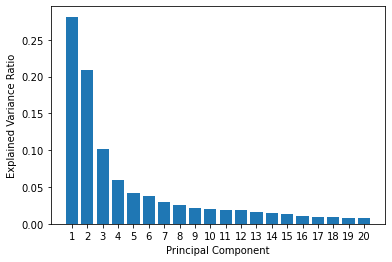

In [57]:
plt.bar(range(1, 21), filtered_pca1.explained_variance_ratio_[0:20])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, 21))
plt.show()

In [58]:
filtered_pca1.explained_variance_ratio_

array([0.28123134, 0.20948999, 0.10193812, 0.05984639, 0.04173367,
       0.03754766, 0.03023536, 0.02516983, 0.02184808, 0.01966989,
       0.01890735, 0.01838053, 0.01550588, 0.01466067, 0.01327966,
       0.00997892, 0.00980196, 0.00864983, 0.00741003, 0.00727333,
       0.00648518, 0.00592371, 0.00530741, 0.00510965, 0.00427241])

The first 4 components explain about 65% of the variance in the filtered data. So I am going to keep those components. An argument could have been made to just keep the first 2 considering they explain 48% of the variance. I felt 4 components was an appropriate amount

This is the same as before, I run PCA, get the scores and plot them to find the correct number of clusters

In [59]:
filtered_pca = PCA(n_components = 4)
filtered_X_pca = filtered_pca.fit_transform(filtered_X)

In [60]:
wcss = []
ch_scores = []
db_scores = []
s_scores = []

for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 9)
    kmeans.fit(filtered_X_pca)
    wcss.append(kmeans.inertia_)
    ch_scores.append(calinski_harabasz_score(filtered_X_pca, kmeans.labels_))
    db_scores.append(davies_bouldin_score(filtered_X_pca, kmeans.labels_))
    s_scores.append(silhouette_score(filtered_X_pca, kmeans.labels_))

C:\Users\tfurr\AppData\Local\Temp\ipykernel_4064\2825464523.py:16: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



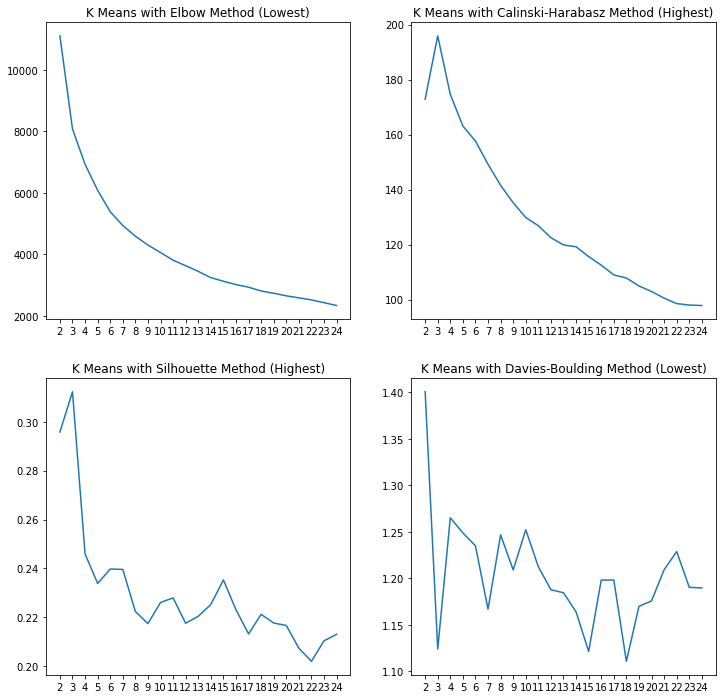

In [61]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0,0].plot(range(2, 25), wcss)
ax[0,0].set_title('K Means with Elbow Method (Lowest)')
ax[0,0].set_xticks(range(2,25))
ax[0,1].plot(range(2, 25), ch_scores)
ax[0,1].set_title('K Means with Calinski-Harabasz Method (Highest)')
ax[0,1].set_xticks(range(2,25))
ax[1,0].plot(range(2, 25), s_scores)
ax[1,0].set_title('K Means with Silhouette Method (Highest)')
ax[1,0].set_xticks(range(2,25))
ax[1,1].plot(range(2, 25), db_scores)
ax[1,1].set_title('K Means with Davies-Boulding Method (Lowest)')
ax[1,1].set_xticks(range(2,25))

fig.show()

We can see from our graphs above that the silhouette, Davies-Boulding and Calinski-Harabasz scores all give 3 clusters as the best number of clusters, just like with the original filtered data. We will perform k-means with 3 clusters and see the results. 

In [62]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(filtered_X_pca)

labels3_pca = kmeans.labels_

# Use this line to make sure a warning does not appear as a copy of a slice
filtered_df.loc[:, 'labels_3_pca'] = labels3_pca

In [63]:
filtered_df.head()

Player Team  Age   Min   PTS   FGM   FGA   FG%  3PM   3PA  \
0              Joel Embiid  PHI   29  34.6  33.1  11.0  20.1  54.8  1.0   3.0   
1              Luka Doncic  DAL   24  36.2  32.4  10.9  22.0  49.6  2.8   8.2   
2           Damian Lillard  POR   32  36.3  32.2   9.6  20.7  46.3  4.2  11.3   
3  Shai Gilgeous-Alexander  OKC   24  35.5  31.4  10.4  20.3  51.0  0.9   2.5   
4    Giannis Antetokounmpo  MIL   28  32.1  31.1  11.2  20.3  55.3  0.7   2.7   

    3P%   FTM   FTA   FT%  OREB  DREB   REB  AST  TOV  STL  BLK   PF    FP  \
0  33.0  10.0  11.7  85.7   1.7   8.4  10.2  4.2  3.4  1.0  1.7  3.1  56.2   
1  34.2   7.8  10.5  74.2   0.8   7.8   8.6  8.0  3.6  1.4  0.5  2.5  56.8   
2  37.1   8.8   9.6  91.4   0.8   4.0   4.8  7.3  3.3  0.9  0.3  1.9  49.1   
3  34.5   9.8  10.9  90.5   0.9   4.0   4.8  5.5  2.8  1.6  1.0  2.8  50.4   
4  27.5   7.9  12.3  64.5   2.2   9.6  11.8  5.7  3.9  0.8  0.8  3.1  54.8   

    DD2   TD3  +/-  OFFRTG  DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  \
0  39.0   1.0  6.4   119.0   110.2     8.8  23.3    1.21       12.7    5.7   
1  36.0  10.0  1.9   118.1   116.0     2.1  40.8    2.24       21.1    2.4   
2  16.0   2.0  1.8   119.5   117.4     2.1  33.8    2.23       20.8    2.2   
3   3.0   0.0  2.2   116.1   113.3     2.7  24.9    1.93       16.4    2.3   
4  46.0   6.0  5.4   116.4   109.2     7.2  31.4    1.46       16.2    6.5   

   DREB%  REB%  TO RATIO  EFG%   TS%  USG%    PACE   PIE  POSS  GP   W   L  \
0   24.3  15.7      10.5  57.3  65.5  37.0   97.34  21.3  4639  66  43  23   
1   22.4  12.4       9.4  56.0  60.9  36.8   97.63  20.2  4874  66  33  33   
2   11.2   6.8       9.3  56.4  64.5  33.1   99.78  17.3  4385  58  27  31   
3   10.9   6.5       8.5  53.1  62.6  31.8  103.47  17.5  5211  68  33  35   
4   26.8  17.1      11.1  57.2  60.5  37.3  103.63  20.4  4380  63  47  16   

   %FGA2PT  %FGA3PT  %PTS2PT  %PTS2PT MR  %PTS3PT  %PTSFBPs  %PTSFT  \
0     84.9     15.1     60.7        15.7      9.1       6.3    30.2   
1     62.7     37.3     50.0         8.5     26.0       5.2    24.0   
2     45.3     54.7     33.4         6.0     39.2       8.6    27.4   
3     87.8     12.2     60.5         9.7      8.1      12.7    31.4   
4     86.6     13.4     67.4         7.0      7.2      17.5    25.4   

   %PTSOFFTO  %PTSPITP  2FGM%AST  2FGM%UAST  3FGM%AST  3FGM%UAST  FGM%AST  \
0       12.7      45.0      60.0       40.0      89.4       10.6     62.6   
1       14.0      41.4      13.1       86.9      21.6       78.4     15.3   
2       11.9      27.4      15.7       84.3      51.6       48.4     31.5   
3       17.7      50.8      20.1       79.9      31.0       69.0     21.0   
4       12.9      60.3      41.5       58.5      61.7       38.3     42.9   

   FGM%UAST  labels_6  labels_17 labels_3  labels_3_pca  
0      37.4         4         13        2             0  
1      84.7         4          1        2             0  
2      68.5         4          1        2             0  
3      79.0         4          1        2             0  
4      57.1         4         13        2             0

In [64]:
filtered_df.labels_3_pca.value_counts() # Look at the distribution

1    217
0    109
2     90
Name: labels_3_pca, dtype: int64

In [65]:
filtered_df_new_pca = pd.DataFrame({'Player': filtered_df.Player, 'PC1': filtered_X_pca[:, 0], 'PC2': filtered_X_pca[:, 1], 'PC3': filtered_X_pca[:, 2], 'Cluster': filtered_df.labels_3_pca})
filtered_df_new_pca['Cluster'] = filtered_df_new_pca['Cluster'].astype('category')

In [66]:
fig = px.scatter(filtered_df_new_pca, x='PC1', y='PC2', color='Cluster', hover_data=['Player'],
                 title="2023 NBA Regular Filtered PCA Season Stats Clustering on 2 Components")

fig.show()

In [67]:
fig = px.scatter_3d(filtered_df_new_pca, x='PC1', y='PC2',z='PC3', color='Cluster', hover_data=['Player'],
                 title="2023 NBA Regular Filtered PCA Season Stats Clustering on 3 Components")

fig.show()

In terms of the players in each cluster, PCA and the regular filtered data aren't that different. That tells me that the players that were only playing a few minutes were causing some problems. In terms of the visualizations, PCA obviously makes it easier to see the clusters since we are looking at components and not actual variables. The interesting this is that I can see a more definitive break in the clusters. I can essentially label them. Label 2 contains your more traditional high-rebounding and blocking, lower three point shooting big men. This includes Mitchell Robinson, Rudy Gobert, Deandre Ayton, etc. Cluster 0 is your more traditional high volume players. Essentially these are the best players on teams and can often be considered superstars. This includes Luka Doncic, Devin Booker, Giannis Antetokounmpo, Nikola Jokic and many others. Cluster 1 is essentially everyone else. This includes 3 and d players (Grand Williams, Cam Johnson, Michael Porter Jr.) and other role players along with those that don't play as much. I like this because we can see the break in where players end up a little more.